In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.transform import Rotation as R
import os

In [2]:
df1 = pd.read_csv("handlandmark_wide_01.csv")

df1

,dataset_id,frame,time_sec,hand,hand_detected,x_0,x_1,x_2,x_3,x_4,...,z_12,z_13,z_14,z_15,z_16,z_17,z_18,z_19,z_20,behavior
0,1,4838,80.633,Left,1,0.562638,0.523307,0.482645,0.453211,0.428097,...,0.023250,0.028924,0.040879,0.040476,0.037134,0.040757,0.047972,0.050100,0.050478,other
1,1,4839,80.650,Left,1,0.568650,0.525218,0.484482,0.452202,0.425792,...,0.017942,0.029138,0.037961,0.035304,0.031126,0.042559,0.047509,0.047854,0.047420,other
2,1,4840,80.667,Left,1,0.608788,0.557545,0.508360,0.473195,0.442089,...,0.088957,0.051530,0.078208,0.091393,0.097686,0.066829,0.087819,0.099258,0.106655,other
3,1,4841,80.683,Left,1,0.649046,0.593075,0.538306,0.499576,0.468654,...,0.063482,0.053335,0.076139,0.072194,0.064933,0.070201,0.086469,0.086850,0.084640,other
4,1,4842,80.700,Left,1,0.650377,0.594110,0.538319,0.499342,0.467740,...,0.073443,0.059745,0.085387,0.082217,0.074459,0.077140,0.094935,0.095359,0.092450,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20136,1,19710,328.500,Left,1,0.311720,0.297826,0.293309,0.294820,0.295616,...,-0.007252,-0.004126,-0.007286,-0.008743,-0.009435,-0.006742,-0.009787,-0.010199,-0.009948,other
20137,1,19711,328.517,Left,1,0.311947,0.297670,0.292881,0.294617,0.296289,...,-0.007276,-0.004394,-0.007549,-0.009065,-0.009800,-0.007341,-0.010199,-0.010448,-0.010084,other
20138,1,19712,328.533,Left,1,0.309626,0.296338,0.291970,0.294021,0.296531,...,-0.004459,-0.003085,-0.005451,-0.005482,-0.005231,-0.006067,-0.008032,-0.006915,-0.005576,other
20139,1,19713,328.550,Left,1,0.309902,0.296132,0.292008,0.293910,0.295692,...,-0.003812,-0.001892,-0.004284,-0.004513,-0.004368,-0.004847,-0.006611,-0.005756,-0.004677,other


In [3]:
df2 = pd.read_csv("controller_with_aligned_time_01.csv")

df2

,FrameNumber,TimeSinceStartup,time_sec_offset,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW,...,ctrl_dy,ctrl_dz,controller_speed,head_dx,head_dy,head_dz,headset_speed,controller_speed_smooth,time_sec_aligned,behavior
0,1,0.00000,-11.56000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.56000,NaN
1,2,0.02000,-11.54000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-11.54000,NaN
2,3,0.13530,-11.42470,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-11.42470,NaN
3,4,0.15699,-11.40301,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-11.40301,NaN
4,5,0.16459,-11.39541,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,...,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,NaN,-11.39541,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24228,24229,338.75310,327.19310,-0.01703,1.20547,0.25843,0.14216,-0.24912,-0.05127,0.95661,...,0.00000,0.00000,0.000000,-0.00094,0.00007,-0.00037,0.001013,0.00,327.19310,other
24229,24230,338.76720,327.20720,-0.01803,1.20564,0.25798,0.14186,-0.25078,-0.05025,0.95627,...,0.00000,0.00000,0.000000,-0.00100,0.00017,-0.00045,0.001110,0.00,327.20720,other
24230,24231,338.78070,327.22070,-0.01895,1.20573,0.25767,0.14156,-0.25263,-0.05002,0.95584,...,0.00000,0.00000,0.000000,-0.00092,0.00009,-0.00031,0.000975,0.00,327.22070,other
24231,24232,338.79460,327.23460,-0.01980,1.20583,0.25718,0.14113,-0.25406,-0.04937,0.95556,...,0.00000,0.00000,0.000000,-0.00085,0.00010,-0.00049,0.000986,0.00,327.23460,other


In [4]:
df1_sorted = df1.sort_values('time_sec')
df2_sorted = df2.sort_values('time_sec_aligned').rename(columns={'time_sec_aligned': 'time_sec'})

df_merged = pd.merge_asof(df1_sorted, df2_sorted, on='time_sec', direction='nearest', tolerance=0.05)

In [5]:
df_merged

,dataset_id,frame,time_sec,hand,hand_detected,x_0,x_1,x_2,x_3,x_4,...,ctrl_dx,ctrl_dy,ctrl_dz,controller_speed,head_dx,head_dy,head_dz,headset_speed,controller_speed_smooth,behavior_y
0,1,4838,80.633,Left,1,0.562638,0.523307,0.482645,0.453211,0.428097,...,0.0,0.0,0.0,0.0,0.00002,-0.00002,0.00000,0.000028,0.0,other
1,1,4839,80.650,Left,1,0.568650,0.525218,0.484482,0.452202,0.425792,...,0.0,0.0,0.0,0.0,-0.00008,-0.00001,0.00005,0.000095,0.0,other
2,1,4840,80.667,Left,1,0.608788,0.557545,0.508360,0.473195,0.442089,...,0.0,0.0,0.0,0.0,-0.00006,-0.00001,0.00004,0.000073,0.0,other
3,1,4841,80.683,Left,1,0.649046,0.593075,0.538306,0.499576,0.468654,...,0.0,0.0,0.0,0.0,-0.00004,-0.00001,0.00004,0.000057,0.0,other
4,1,4842,80.700,Left,1,0.650377,0.594110,0.538319,0.499342,0.467740,...,0.0,0.0,0.0,0.0,-0.00004,-0.00001,0.00004,0.000057,0.0,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20136,1,19710,328.500,Left,1,0.311720,0.297826,0.293309,0.294820,0.295616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20137,1,19711,328.517,Left,1,0.311947,0.297670,0.292881,0.294617,0.296289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20138,1,19712,328.533,Left,1,0.309626,0.296338,0.291970,0.294021,0.296531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20139,1,19713,328.550,Left,1,0.309902,0.296132,0.292008,0.293910,0.295692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
for col in df_merged:
    print(col)

dataset_id
frame
time_sec
hand
hand_detected
x_0
x_1
x_2
x_3
x_4
x_5
x_6
x_7
x_8
x_9
x_10
x_11
x_12
x_13
x_14
x_15
x_16
x_17
x_18
x_19
x_20
y_0
y_1
y_2
y_3
y_4
y_5
y_6
y_7
y_8
y_9
y_10
y_11
y_12
y_13
y_14
y_15
y_16
y_17
y_18
y_19
y_20
z_0
z_1
z_2
z_3
z_4
z_5
z_6
z_7
z_8
z_9
z_10
z_11
z_12
z_13
z_14
z_15
z_16
z_17
z_18
z_19
z_20
behavior_x
FrameNumber
TimeSinceStartup
time_sec_offset
HeadsetPosX
HeadsetPosY
HeadsetPosZ
HeadsetRotX
HeadsetRotY
HeadsetRotZ
HeadsetRotW
ControllerPosX
ControllerPosY
ControllerPosZ
ControllerRotX
ControllerRotY
ControllerRotZ
ControllerRotW
ctrl_dx
ctrl_dy
ctrl_dz
controller_speed
head_dx
head_dy
head_dz
headset_speed
controller_speed_smooth
behavior_y


In [7]:
unmatched = df_merged[df_merged['frame'].isna()]
print(f"num of row connot merge: {len(unmatched)}")

success_rate = 100 * df_merged['frame'].notna().sum() / len(df_merged)
print(f"merged: {success_rate:.2f}%")


num of row connot merge: 0
merged: 100.00%


In [8]:
df_merged[(df_merged['time_sec_offset'] <= 81.283)][['TimeSinceStartup', 'time_sec_offset', 'time_sec', 'behavior_x', 'behavior_y', 'HeadsetPosX']]

,TimeSinceStartup,time_sec_offset,time_sec,behavior_x,behavior_y,HeadsetPosX
0,92.18940,80.62940,80.633,other,other,0.02132
1,92.20361,80.64361,80.650,other,other,0.02124
2,92.21703,80.65703,80.667,other,other,0.02118
3,92.25182,80.69182,80.683,other,other,0.02114
4,92.25182,80.69182,80.700,other,other,0.02114
5,92.28314,80.72314,80.717,other,other,0.02103
6,92.29696,80.73696,80.733,other,other,0.02102
7,92.31074,80.75074,80.750,other,other,0.02102
8,92.32490,80.76490,80.767,other,other,0.02102
9,92.33887,80.77887,80.783,other,other,0.02103


In [9]:
columns_to_keep = [
    'dataset_id', 'frame', 'time_sec', 'hand', 'hand_detected',
    'behavior_x', 'TimeSinceStartup', 'time_sec_offset',
    # x
    *[f'x_{i}' for i in range(21)],
    # y
    *[f'y_{i}' for i in range(21)],
    # z
    *[f'z_{i}' for i in range(21)],
    'HeadsetPosX', 'HeadsetPosY', 'HeadsetPosZ',
    'HeadsetRotX', 'HeadsetRotY', 'HeadsetRotZ', 'HeadsetRotW',
    'ControllerPosX', 'ControllerPosY', 'ControllerPosZ',
    'ControllerRotX', 'ControllerRotY', 'ControllerRotZ', 'ControllerRotW',
]

df_selected = df_merged[columns_to_keep]

In [10]:
df_selected

,dataset_id,frame,time_sec,hand,hand_detected,behavior_x,TimeSinceStartup,time_sec_offset,x_0,x_1,...,HeadsetRotY,HeadsetRotZ,HeadsetRotW,ControllerPosX,ControllerPosY,ControllerPosZ,ControllerRotX,ControllerRotY,ControllerRotZ,ControllerRotW
0,1,4838,80.633,Left,1,other,92.18940,80.62940,0.562638,0.523307,...,0.20110,-0.01786,0.96564,0.22639,0.77504,0.72136,-0.34772,-0.03732,0.00460,-0.93684
1,1,4839,80.650,Left,1,other,92.20361,80.64361,0.568650,0.525218,...,0.20111,-0.01779,0.96567,0.22639,0.77504,0.72136,-0.34772,-0.03732,0.00461,-0.93684
2,1,4840,80.667,Left,1,other,92.21703,80.65703,0.608788,0.557545,...,0.20105,-0.01759,0.96568,0.22639,0.77504,0.72136,-0.34772,-0.03732,0.00460,-0.93684
3,1,4841,80.683,Left,1,other,92.25182,80.69182,0.649046,0.593075,...,0.20096,-0.01766,0.96572,0.22639,0.77504,0.72136,-0.34772,-0.03732,0.00460,-0.93684
4,1,4842,80.700,Left,1,other,92.25182,80.69182,0.650377,0.594110,...,0.20096,-0.01766,0.96572,0.22639,0.77504,0.72136,-0.34772,-0.03732,0.00460,-0.93684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20136,1,19710,328.500,Left,1,other,NaN,NaN,0.311720,0.297826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20137,1,19711,328.517,Left,1,other,NaN,NaN,0.311947,0.297670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20138,1,19712,328.533,Left,1,other,NaN,NaN,0.309626,0.296338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20139,1,19713,328.550,Left,1,other,NaN,NaN,0.309902,0.296132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_selected[(df_selected['time_sec'] <=154.817)][['TimeSinceStartup', 'time_sec_offset', 'time_sec', 'behavior_x', 'HeadsetPosX']]

,TimeSinceStartup,time_sec_offset,time_sec,behavior_x,HeadsetPosX
0,92.18940,80.62940,80.633,other,0.02132
1,92.20361,80.64361,80.650,other,0.02124
2,92.21703,80.65703,80.667,other,0.02118
3,92.25182,80.69182,80.683,other,0.02114
4,92.25182,80.69182,80.700,other,0.02114
...,...,...,...,...,...
4917,166.34230,154.78230,154.783,hold,-0.00381
4918,166.35570,154.79570,154.800,hold,-0.00383
4919,166.35570,154.79570,154.800,hold,-0.00383
4920,166.38340,154.82340,154.817,adjust,-0.00391


In [12]:
df_selected[(df_selected['time_sec'] <=303.300)][['TimeSinceStartup', 'time_sec_offset', 'time_sec', 'behavior_x', 'HeadsetPosX']]

,TimeSinceStartup,time_sec_offset,time_sec,behavior_x,HeadsetPosX
0,92.18940,80.62940,80.633,other,0.02132
1,92.20361,80.64361,80.650,other,0.02124
2,92.21703,80.65703,80.667,other,0.02118
3,92.25182,80.69182,80.683,other,0.02114
4,92.25182,80.69182,80.700,other,0.02114
...,...,...,...,...,...
18177,314.82410,303.26410,303.267,press,-0.02549
18178,314.83840,303.27840,303.283,press,-0.02544
18179,314.83840,303.27840,303.283,press,-0.02544
18180,314.86620,303.30620,303.300,hold,-0.02535


In [13]:
df_selected[(df_selected['time_sec'] <=314.317)][['TimeSinceStartup', 'time_sec_offset', 'time_sec', 'behavior_x', 'HeadsetPosX']]

,TimeSinceStartup,time_sec_offset,time_sec,behavior_x,HeadsetPosX
0,92.18940,80.62940,80.633,other,0.02132
1,92.20361,80.64361,80.650,other,0.02124
2,92.21703,80.65703,80.667,other,0.02118
3,92.25182,80.69182,80.683,other,0.02114
4,92.25182,80.69182,80.700,other,0.02114
...,...,...,...,...,...
19499,325.84580,314.28580,314.283,hold,-0.01336
19500,325.86020,314.30020,314.300,hold,-0.01336
19501,325.86020,314.30020,314.300,hold,-0.01336
19502,325.87360,314.31360,314.317,place,-0.01338


In [14]:
df_selected[(df_selected['time_sec'] <=316.970)][['TimeSinceStartup', 'time_sec_offset', 'time_sec', 'behavior_x', 'HeadsetPosX']]

,TimeSinceStartup,time_sec_offset,time_sec,behavior_x,HeadsetPosX
0,92.18940,80.62940,80.633,other,0.02132
1,92.20361,80.64361,80.650,other,0.02124
2,92.21703,80.65703,80.667,other,0.02118
3,92.25182,80.69182,80.683,other,0.02114
4,92.25182,80.69182,80.700,other,0.02114
...,...,...,...,...,...
19717,328.34620,316.78620,316.783,place,0.00841
19718,328.36060,316.80060,316.800,place,0.00987
19719,328.37430,316.81430,316.817,place,0.01131
19720,328.38840,316.82840,316.833,place,0.01270


In [15]:
for col in df_selected:
    print(col)

dataset_id
frame
time_sec
hand
hand_detected
behavior_x
TimeSinceStartup
time_sec_offset
x_0
x_1
x_2
x_3
x_4
x_5
x_6
x_7
x_8
x_9
x_10
x_11
x_12
x_13
x_14
x_15
x_16
x_17
x_18
x_19
x_20
y_0
y_1
y_2
y_3
y_4
y_5
y_6
y_7
y_8
y_9
y_10
y_11
y_12
y_13
y_14
y_15
y_16
y_17
y_18
y_19
y_20
z_0
z_1
z_2
z_3
z_4
z_5
z_6
z_7
z_8
z_9
z_10
z_11
z_12
z_13
z_14
z_15
z_16
z_17
z_18
z_19
z_20
HeadsetPosX
HeadsetPosY
HeadsetPosZ
HeadsetRotX
HeadsetRotY
HeadsetRotZ
HeadsetRotW
ControllerPosX
ControllerPosY
ControllerPosZ
ControllerRotX
ControllerRotY
ControllerRotZ
ControllerRotW


In [16]:
df_selected = df_selected.rename(columns={'behavior_x': 'behavior'})

In [17]:
df_selected.describe()

,dataset_id,frame,time_sec,hand_detected,TimeSinceStartup,time_sec_offset,x_0,x_1,x_2,x_3,...,HeadsetRotY,HeadsetRotZ,HeadsetRotW,ControllerPosX,ControllerPosY,ControllerPosZ,ControllerRotX,ControllerRotY,ControllerRotZ,ControllerRotW
count,20141.0,20141.000000,20141.000000,20141.0,20112.000000,20112.000000,20141.000000,20141.000000,20141.000000,20141.000000,...,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000
mean,1.0,12568.129140,209.468819,1.0,220.857439,209.297439,0.485300,0.517454,0.543010,0.554418,...,0.289096,-0.012162,0.942427,0.175132,0.899519,0.540945,-0.081282,0.082232,0.096385,-0.883373
std,0.0,4116.497306,68.608288,0.0,68.508940,68.508940,0.157911,0.146111,0.140659,0.135435,...,0.063662,0.017745,0.021931,0.063545,0.094716,0.118099,0.166599,0.249241,0.271639,0.182592
min,1.0,4838.000000,80.633000,1.0,92.189400,80.629400,0.081359,0.131138,0.166266,0.169723,...,-0.277630,-0.103780,0.673390,0.000000,-0.019640,0.045980,-0.618980,-0.777410,-0.811990,-0.999210
25%,1.0,9346.000000,155.767000,1.0,167.268900,155.708900,0.341233,0.390281,0.423645,0.433071,...,0.269620,-0.022232,0.935880,0.129235,0.857620,0.483150,-0.238480,-0.078402,0.018280,-0.961172
50%,1.0,12658.000000,210.967000,1.0,222.286250,210.726250,0.564546,0.583425,0.591451,0.579454,...,0.285040,-0.011675,0.945160,0.156810,0.928360,0.519670,-0.028595,0.070605,0.162675,-0.934070
75%,1.0,16351.000000,272.517000,1.0,283.888900,272.328900,0.612520,0.641135,0.664139,0.673173,...,0.314120,0.000530,0.951650,0.207560,0.953300,0.573860,0.051540,0.223967,0.256252,-0.886857
max,1.0,19714.000000,328.567000,1.0,335.847200,324.287200,0.786857,0.776391,0.810150,0.822483,...,0.737580,0.040410,0.979040,0.575200,1.166470,0.920070,0.500000,0.810740,0.896520,0.866030


In [18]:
for col in df_selected.columns:
    print(col)

dataset_id
frame
time_sec
hand
hand_detected
behavior
TimeSinceStartup
time_sec_offset
x_0
x_1
x_2
x_3
x_4
x_5
x_6
x_7
x_8
x_9
x_10
x_11
x_12
x_13
x_14
x_15
x_16
x_17
x_18
x_19
x_20
y_0
y_1
y_2
y_3
y_4
y_5
y_6
y_7
y_8
y_9
y_10
y_11
y_12
y_13
y_14
y_15
y_16
y_17
y_18
y_19
y_20
z_0
z_1
z_2
z_3
z_4
z_5
z_6
z_7
z_8
z_9
z_10
z_11
z_12
z_13
z_14
z_15
z_16
z_17
z_18
z_19
z_20
HeadsetPosX
HeadsetPosY
HeadsetPosZ
HeadsetRotX
HeadsetRotY
HeadsetRotZ
HeadsetRotW
ControllerPosX
ControllerPosY
ControllerPosZ
ControllerRotX
ControllerRotY
ControllerRotZ
ControllerRotW


In [19]:
df_selected[[col for col in df_selected.columns if col.startswith('x_')]].describe()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,x_20
count,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,...,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000
mean,0.485300,0.517454,0.543010,0.554418,0.555914,0.546067,0.553284,0.546831,0.540125,0.524613,...,0.522348,0.518048,0.503564,0.506034,0.504383,0.503047,0.484193,0.486576,0.487999,0.490010
std,0.157911,0.146111,0.140659,0.135435,0.131254,0.146684,0.137075,0.130477,0.127277,0.146655,...,0.123442,0.121091,0.146454,0.130712,0.124173,0.123386,0.145345,0.131205,0.126663,0.127207
min,0.081359,0.131138,0.166266,0.169723,0.169842,0.118044,0.122581,0.158313,0.172625,0.090545,...,0.133875,0.150227,0.071339,0.091943,0.110615,0.126673,0.060312,0.078657,0.094077,0.106589
25%,0.341233,0.390281,0.423645,0.433071,0.443454,0.424316,0.435743,0.435574,0.430813,0.402918,...,0.423162,0.417716,0.381160,0.403153,0.407140,0.403248,0.363141,0.382622,0.388826,0.389145
50%,0.564546,0.583425,0.591451,0.579454,0.573417,0.592420,0.594891,0.580879,0.568676,0.579775,...,0.562275,0.554236,0.563603,0.550047,0.545954,0.546601,0.537985,0.526440,0.528749,0.534961
75%,0.612520,0.641135,0.664139,0.673173,0.671063,0.662552,0.655478,0.646614,0.639760,0.639675,...,0.612606,0.608315,0.616878,0.602485,0.596719,0.596670,0.596009,0.583588,0.581970,0.587516
max,0.786857,0.776391,0.810150,0.822483,0.837492,0.820413,0.838634,0.846380,0.871078,0.801185,...,0.868084,0.893346,0.814438,0.853543,0.882561,0.905971,0.825038,0.860080,0.882138,0.899473


In [20]:
df_selected[[col for col in df_selected.columns if col.startswith('y_')]].describe()

,y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,...,y_11,y_12,y_13,y_14,y_15,y_16,y_17,y_18,y_19,y_20
count,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,...,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000
mean,0.604285,0.582740,0.536744,0.482082,0.436045,0.452016,0.399076,0.391109,0.395587,0.441354,...,0.416402,0.441929,0.441589,0.404724,0.424585,0.451731,0.447877,0.419005,0.432645,0.453151
std,0.203022,0.209635,0.220468,0.235993,0.252282,0.210040,0.231779,0.249980,0.261083,0.209215,...,0.233942,0.234900,0.213157,0.226107,0.229287,0.230009,0.218815,0.226231,0.228192,0.229361
min,0.058164,0.043249,0.007566,-0.029510,-0.074550,-0.001243,-0.048761,-0.124768,-0.179223,-0.004084,...,-0.171175,-0.216618,-0.049519,-0.153934,-0.208515,-0.246192,-0.084470,-0.165660,-0.217393,-0.253385
25%,0.494483,0.448775,0.395471,0.323004,0.259152,0.316888,0.243851,0.221794,0.212584,0.317098,...,0.257786,0.281357,0.313512,0.257160,0.279925,0.309029,0.326956,0.284968,0.299830,0.317101
50%,0.601715,0.553032,0.493800,0.432230,0.370345,0.410792,0.332149,0.310539,0.316840,0.408915,...,0.357472,0.386465,0.416455,0.359528,0.380017,0.410382,0.429758,0.384367,0.397353,0.417817
75%,0.763838,0.729958,0.674455,0.610280,0.571463,0.596777,0.545572,0.554892,0.574682,0.594296,...,0.578770,0.602855,0.601926,0.572237,0.588776,0.617165,0.614740,0.591623,0.601526,0.621261
max,1.109850,1.089114,1.063597,1.044735,1.027824,1.011450,0.975484,0.972115,0.982451,1.006731,...,0.977296,0.991037,1.007164,0.982322,0.996088,1.010704,1.016297,0.988395,0.989718,0.997328


In [21]:
df_selected[[col for col in df_selected.columns if col.startswith('z_')]].describe()

,z_0,z_1,z_2,z_3,z_4,z_5,z_6,z_7,z_8,z_9,...,z_11,z_12,z_13,z_14,z_15,z_16,z_17,z_18,z_19,z_20
count,2.014100e+04,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,...,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000,20141.000000
mean,7.562870e-08,-0.019980,-0.024901,-0.027314,-0.028359,0.001632,-0.001521,-0.007078,-0.010142,0.010315,...,-0.004266,-0.009009,0.016751,0.010597,0.003505,0.000734,0.021720,0.017010,0.014456,0.014505
std,1.898989e-07,0.020620,0.028916,0.036787,0.045150,0.029085,0.040185,0.044561,0.046938,0.032975,...,0.045002,0.044677,0.036630,0.045324,0.041680,0.038238,0.040537,0.046585,0.044489,0.042219
min,-6.337423e-07,-0.090449,-0.134470,-0.157285,-0.173879,-0.162140,-0.212555,-0.225539,-0.224220,-0.153921,...,-0.202431,-0.205321,-0.144030,-0.179304,-0.192657,-0.199824,-0.142841,-0.177019,-0.188642,-0.194496
25%,-3.524939e-08,-0.036127,-0.047570,-0.056964,-0.064495,-0.009186,-0.024794,-0.036422,-0.042715,-0.002745,...,-0.036099,-0.041789,-0.000990,-0.018086,-0.025828,-0.026330,-0.000955,-0.011310,-0.014836,-0.014127
50%,5.824529e-08,-0.018522,-0.022146,-0.024368,-0.024794,0.003180,0.002835,-0.001077,-0.003094,0.007957,...,0.005745,-0.001683,0.011791,0.013999,0.010132,0.004628,0.015354,0.016552,0.017080,0.017212
75%,1.926450e-07,-0.001166,0.000379,0.003574,0.008599,0.017262,0.021073,0.018807,0.017740,0.031449,...,0.021244,0.016580,0.040569,0.035665,0.025135,0.020539,0.048490,0.042870,0.036334,0.034388
max,1.386660e-06,0.048707,0.106115,0.167325,0.230738,0.138494,0.213435,0.253088,0.278226,0.148487,...,0.275452,0.296987,0.158095,0.229310,0.249887,0.261131,0.169012,0.221190,0.242970,0.259097


In [22]:
df_selected[[
    'ControllerPosX', 'ControllerPosY', 'ControllerPosZ',
    'ControllerRotX', 'ControllerRotY', 'ControllerRotZ',
    'ControllerRotZ', 'HeadsetPosX', 'HeadsetPosY', 'HeadsetPosZ',
    'HeadsetRotX', 'HeadsetRotY', 'HeadsetRotZ',
    'HeadsetRotW',
]].describe()

,ControllerPosX,ControllerPosY,ControllerPosZ,ControllerRotX,ControllerRotY,ControllerRotZ,ControllerRotZ,HeadsetPosX,HeadsetPosY,HeadsetPosZ,HeadsetRotX,HeadsetRotY,HeadsetRotZ,HeadsetRotW
count,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000
mean,0.175132,0.899519,0.540945,-0.081282,0.082232,0.096385,0.096385,-0.012379,1.204216,0.251830,0.150489,0.289096,-0.012162,0.942427
std,0.063545,0.094716,0.118099,0.166599,0.249241,0.271639,0.271639,0.013851,0.005725,0.021016,0.024729,0.063662,0.017745,0.021931
min,0.000000,-0.019640,0.045980,-0.618980,-0.777410,-0.811990,-0.811990,-0.107610,1.181400,0.202300,-0.056010,-0.277630,-0.103780,0.673390
25%,0.129235,0.857620,0.483150,-0.238480,-0.078402,0.018280,0.018280,-0.020640,1.200660,0.242430,0.138298,0.269620,-0.022232,0.935880
50%,0.156810,0.928360,0.519670,-0.028595,0.070605,0.162675,0.162675,-0.011780,1.203820,0.248140,0.154130,0.285040,-0.011675,0.945160
75%,0.207560,0.953300,0.573860,0.051540,0.223967,0.256252,0.256252,-0.004530,1.208100,0.256820,0.165560,0.314120,0.000530,0.951650
max,0.575200,1.166470,0.920070,0.500000,0.810740,0.896520,0.896520,0.047180,1.243160,0.446440,0.227200,0.737580,0.040410,0.979040


In [23]:
print(df_selected.isnull().sum().sum()) 

464


In [24]:
missing_per_column = df_selected.isnull().sum()
print("Missing values per column:")
print(missing_per_column)

print("\nColumns with missing values:")
print(missing_per_column[missing_per_column > 0])

num_rows_with_missing = df_selected.isnull().any(axis=1).sum()
print(f"\nNumber of rows with at least one missing value: {num_rows_with_missing}")

missing_percent = df_selected.isnull().mean() * 100
print("\nMissing value percentage per column:")
print(missing_percent)

Missing values per column:
dataset_id         0
frame              0
time_sec           0
hand               0
hand_detected      0
                  ..
ControllerPosZ    29
ControllerRotX    29
ControllerRotY    29
ControllerRotZ    29
ControllerRotW    29
Length: 85, dtype: int64

Columns with missing values:
TimeSinceStartup    29
time_sec_offset     29
HeadsetPosX         29
HeadsetPosY         29
HeadsetPosZ         29
HeadsetRotX         29
HeadsetRotY         29
HeadsetRotZ         29
HeadsetRotW         29
ControllerPosX      29
ControllerPosY      29
ControllerPosZ      29
ControllerRotX      29
ControllerRotY      29
ControllerRotZ      29
ControllerRotW      29
dtype: int64

Number of rows with at least one missing value: 29

Missing value percentage per column:
dataset_id        0.000000
frame             0.000000
time_sec          0.000000
hand              0.000000
hand_detected     0.000000
                    ...   
ControllerPosZ    0.143985
ControllerRotX    0.143985


In [25]:
df_selected_clean = df_selected[~df_selected.isnull().any(axis=1)]

In [26]:
missing_rows = df_selected[df_selected.isnull().any(axis=1)]
print(missing_rows[['time_sec', 'behavior']]) 

       time_sec behavior
20112   328.133    other
20113   328.150    other
20114   328.167    other
20115   328.183    other
20116   328.183    other
20117   328.200    other
20118   328.217    other
20119   328.217    other
20120   328.233    other
20121   328.250    other
20122   328.267    other
20123   328.283    other
20124   328.300    other
20125   328.317    other
20126   328.333    other
20127   328.350    other
20128   328.367    other
20129   328.383    other
20130   328.400    other
20131   328.417    other
20132   328.433    other
20133   328.450    other
20134   328.467    other
20135   328.483    other
20136   328.500    other
20137   328.517    other
20138   328.533    other
20139   328.550    other
20140   328.567    other


In [27]:
exclude_cols = ['dataset_id', 'time_sec', 'hand', 'hand_detected', 'behavior', 'TimeSinceStartup', 'time_sec_offset']

num_cols = [col for col in df_selected.columns if col not in exclude_cols]

stats_summary = df_selected[num_cols].describe().transpose()
print("Basic Statistics")
print(stats_summary)

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return len(outliers)

stats_summary['outlier_count'] = df_selected[num_cols].apply(count_outliers)

print("\nStats with Outlier Count")
print(stats_summary[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'outlier_count']])

outlier_sorted = stats_summary.sort_values('outlier_count', ascending=False)
print("\nColumns with most outliers:")
print(outlier_sorted[['outlier_count']].head(10))

os.makedirs("outlier_plots", exist_ok=True)

for col in num_cols:
    plt.figure(figsize=(12, 4))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df_selected[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution: {col}")

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_selected[col], color='lightgreen')
    plt.title(f"Boxplot: {col}")

    plt.tight_layout()
    plt.savefig(f"outlier_plots/{col}_distribution.png")
    plt.close()

print("\nAll distribution plots saved in folder: outlier_plots/")

Basic Statistics
                  count          mean          std          min          25%  \
frame           20141.0  12568.129140  4116.497306  4838.000000  9346.000000   
x_0             20141.0      0.485300     0.157911     0.081359     0.341233   
x_1             20141.0      0.517454     0.146111     0.131138     0.390281   
x_2             20141.0      0.543010     0.140659     0.166266     0.423645   
x_3             20141.0      0.554418     0.135435     0.169723     0.433071   
...                 ...           ...          ...          ...          ...   
ControllerPosZ  20112.0      0.540945     0.118099     0.045980     0.483150   
ControllerRotX  20112.0     -0.081282     0.166599    -0.618980    -0.238480   
ControllerRotY  20112.0      0.082232     0.249241    -0.777410    -0.078402   
ControllerRotZ  20112.0      0.096385     0.271639    -0.811990     0.018280   
ControllerRotW  20112.0     -0.883373     0.182592    -0.999210    -0.961172   

                      

In [28]:
print(outlier_sorted[['outlier_count']].to_string())

                outlier_count
ControllerPosZ           2582
ControllerRotW           2525
ControllerRotZ           2427
z_5                      1418
HeadsetPosZ              1258
HeadsetRotY               978
z_9                       900
z_20                      681
z_16                      601
z_6                       595
z_19                      589
ControllerRotY            579
z_13                      548
z_15                      532
HeadsetPosX               515
z_0                       490
HeadsetRotX               436
z_10                      421
z_18                      411
z_14                      402
z_17                      374
z_7                       364
z_12                      354
z_11                      351
HeadsetRotZ               337
HeadsetRotW               319
x_15                      299
x_14                      292
z_8                       262
ControllerPosX            227
HeadsetPosY               219
x_19                      140
Controller

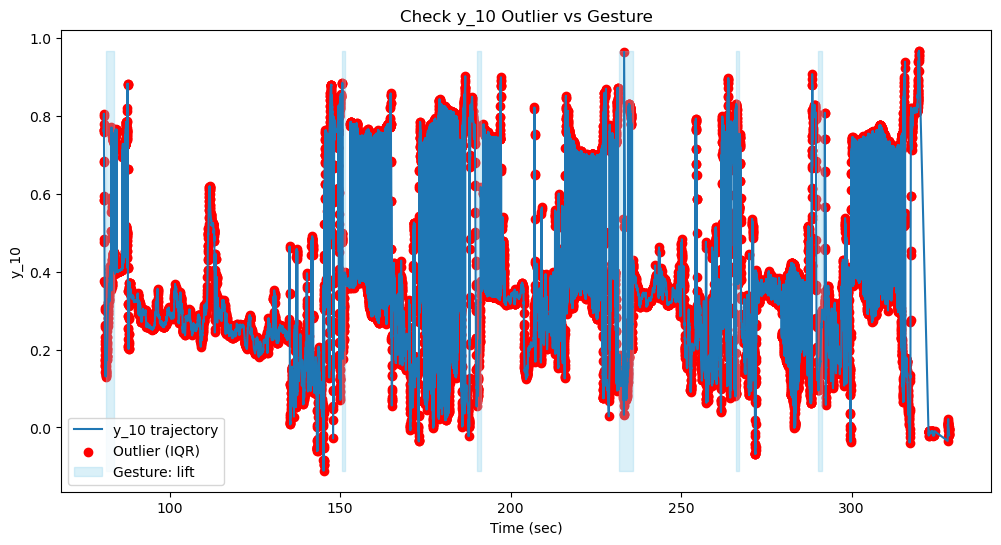

In [30]:
Q1 = df_selected['y_10'].quantile(0.25)
Q3 = df_selected['y_10'].quantile(0.75)
IQR = Q3 - Q1
outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

# วาดกราฟ
plt.figure(figsize=(12, 6))
plt.plot(df_selected['time_sec'], df_selected['y_10'], label='y_10 trajectory')

plt.scatter(
    df_selected.loc[df_selected['y_10'].between(outlier_upper, outlier_lower) == False, 'time_sec'],
    df_selected.loc[df_selected['y_10'].between(outlier_upper, outlier_lower) == False, 'y_10'],
    color='red', label='Outlier (IQR)'
)

plt.fill_between(
    df_selected['time_sec'], df_selected['y_10'].min(), df_selected['y_10'].max(),
    where=(df_selected['behavior'] == 'lift'),
    color='skyblue', alpha=0.3, label='Gesture: lift'
)

plt.legend()
plt.title('Check y_10 Outlier vs Gesture')
plt.xlabel('Time (sec)')
plt.ylabel('y_10')
plt.show()

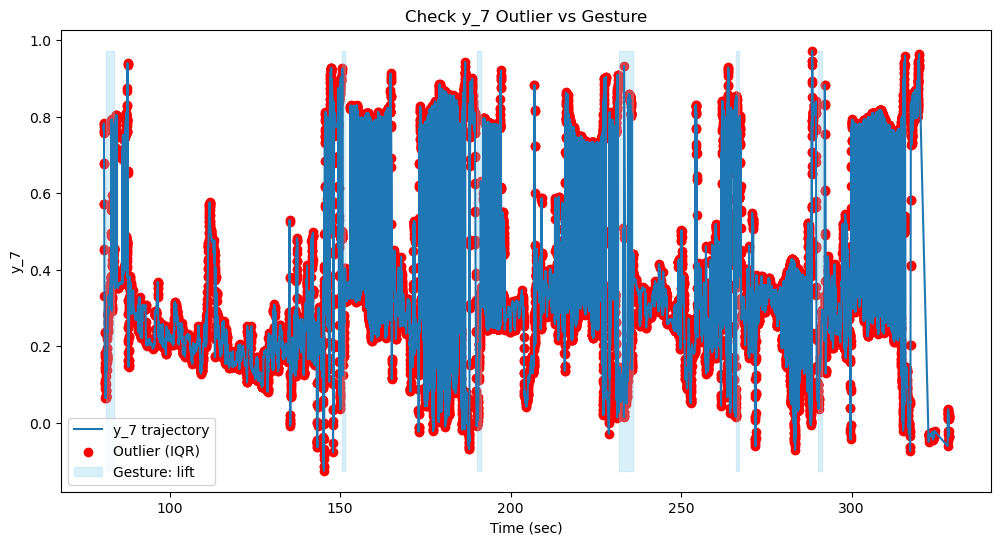

In [31]:
Q1 = df_selected['y_7'].quantile(0.25)
Q3 = df_selected['y_7'].quantile(0.75)
IQR = Q3 - Q1
outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

plt.figure(figsize=(12, 6))
plt.plot(df_selected['time_sec'], df_selected['y_7'], label='y_7 trajectory')

plt.scatter(
    df_selected.loc[df_selected['y_7'].between(outlier_upper, outlier_lower) == False, 'time_sec'],
    df_selected.loc[df_selected['y_7'].between(outlier_upper, outlier_lower) == False, 'y_7'],
    color='red', label='Outlier (IQR)'
)

plt.fill_between(
    df_selected['time_sec'], df_selected['y_7'].min(), df_selected['y_7'].max(),
    where=(df_selected['behavior'] == 'lift'),
    color='skyblue', alpha=0.3, label='Gesture: lift'
)

plt.legend()
plt.title('Check y_7 Outlier vs Gesture')
plt.xlabel('Time (sec)')
plt.ylabel('y_7')
plt.show()

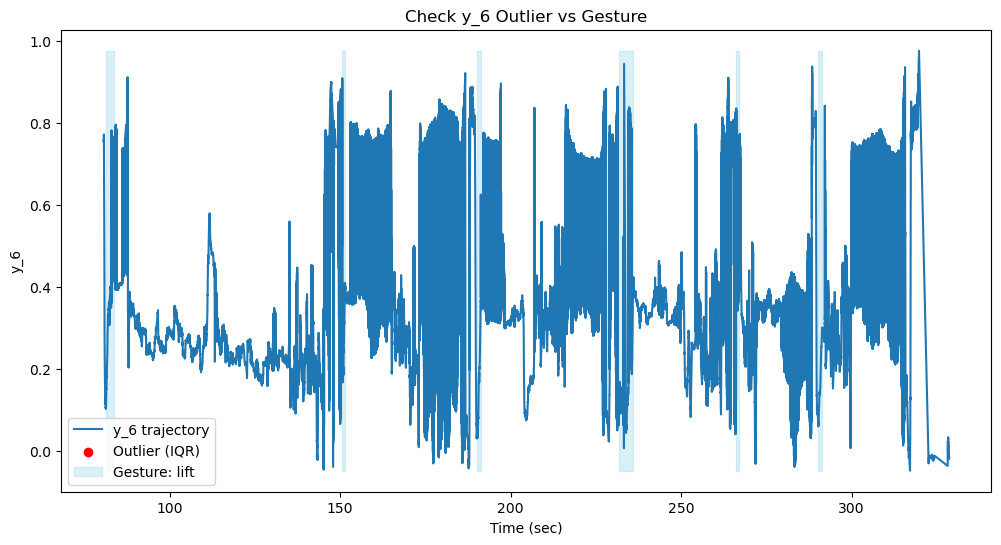

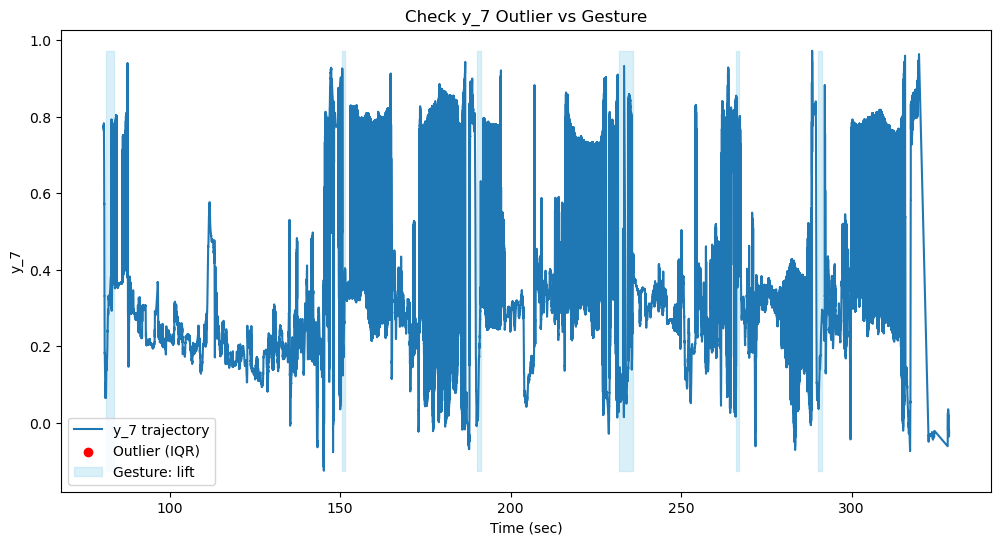

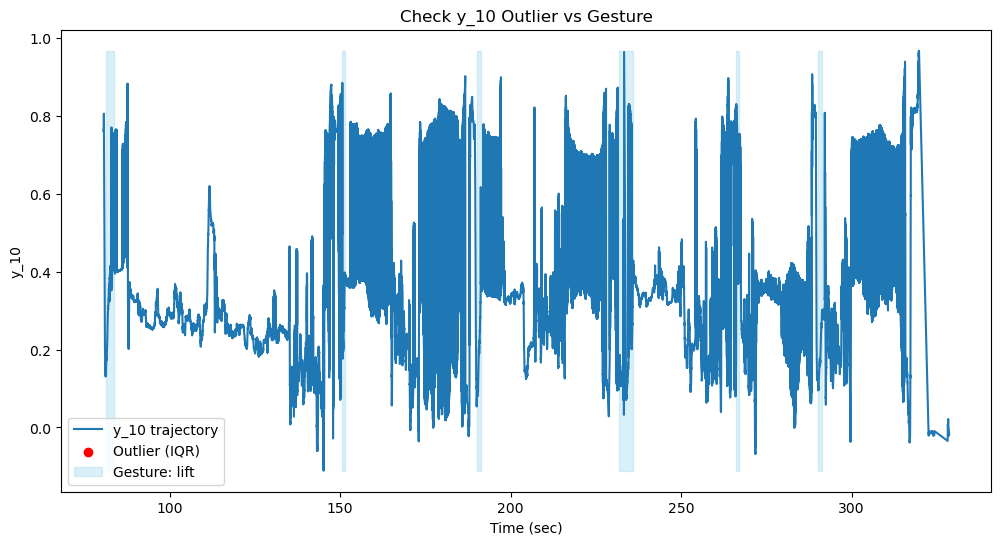

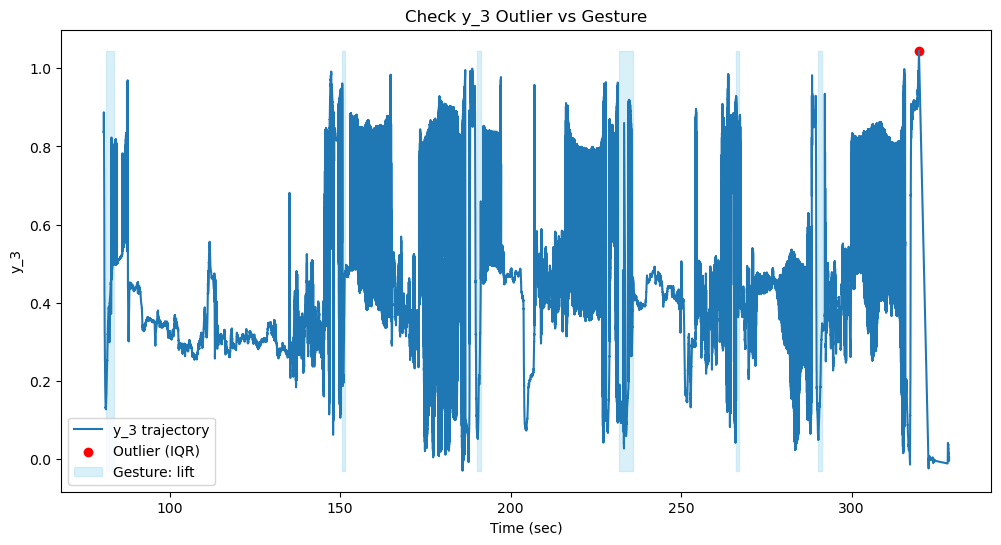

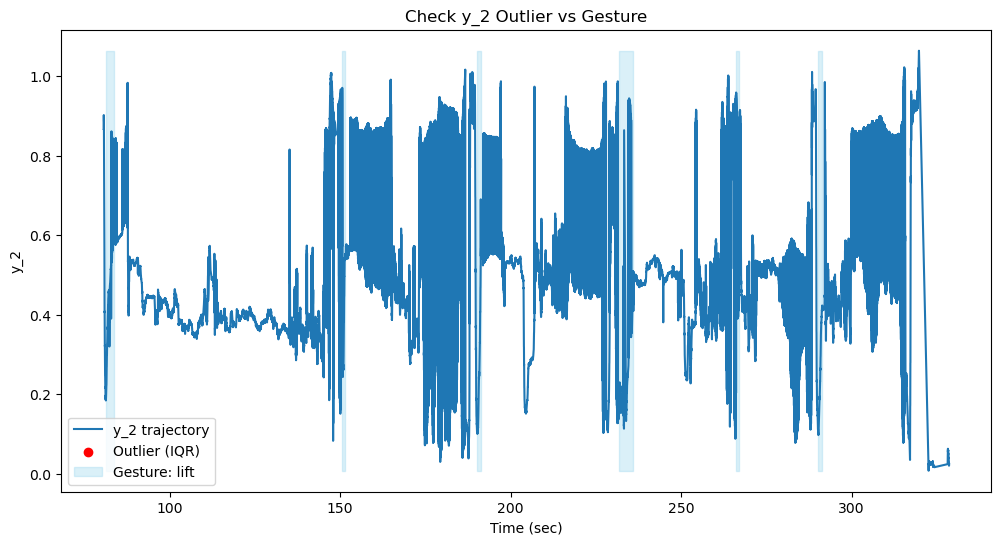

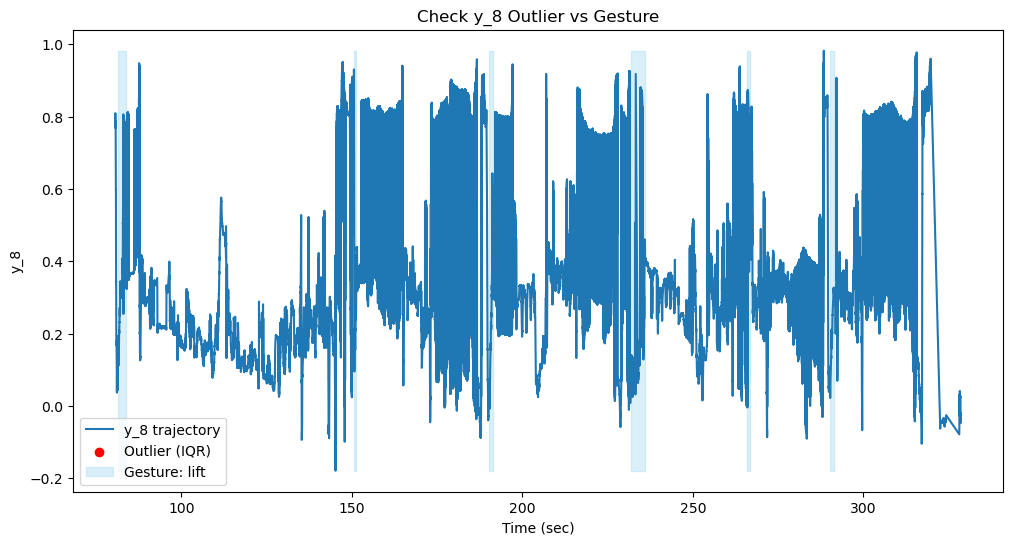

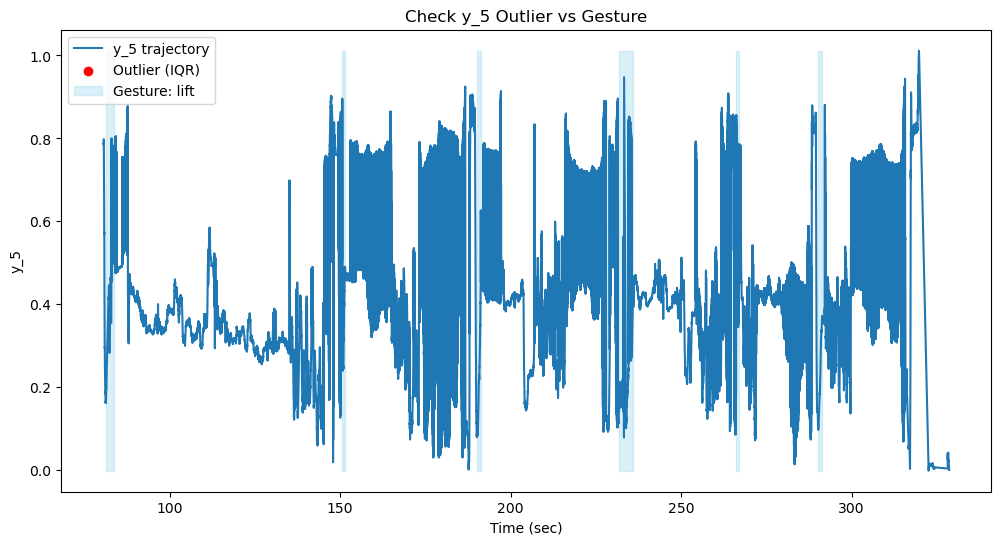

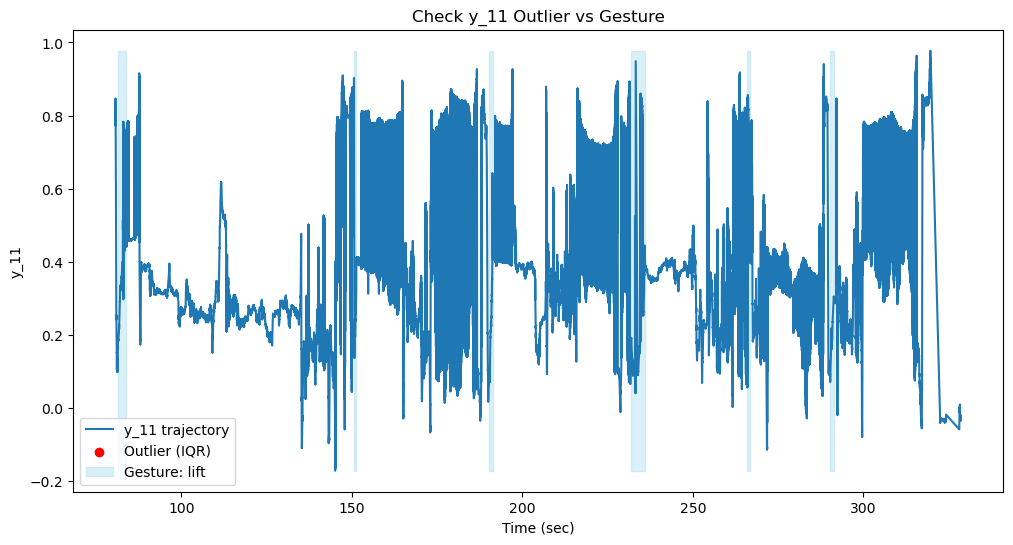

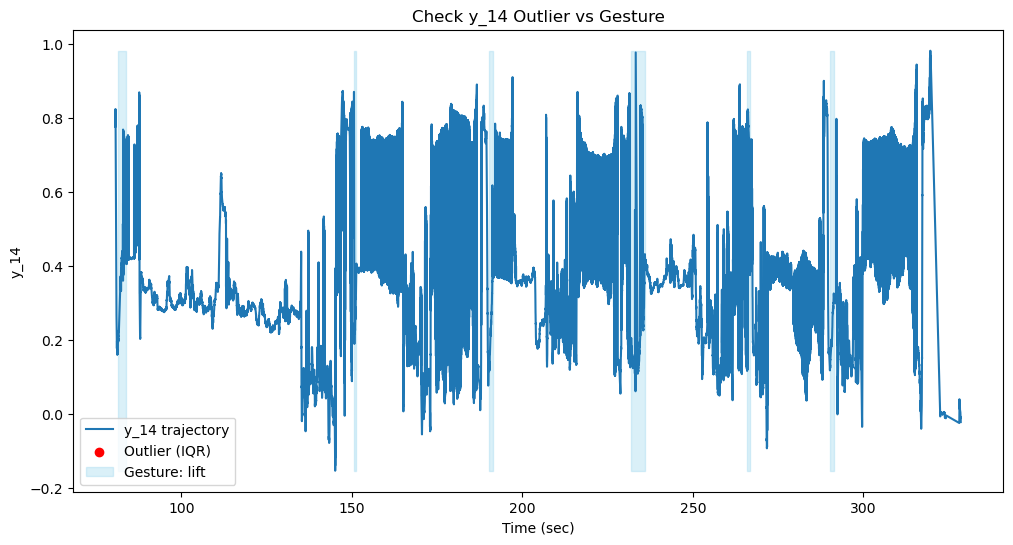

In [32]:
y_columns = ['y_6', 'y_7', 'y_10', 'y_3', 'y_2', 'y_8', 'y_5', 'y_11', 'y_14']

for col in y_columns:
    # คำนวณ IQR
    Q1 = df_selected[col].quantile(0.25)
    Q3 = df_selected[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_lower = Q1 - 1.5 * IQR
    outlier_upper = Q3 + 1.5 * IQR

    outlier_mask = ~df_selected[col].between(outlier_lower, outlier_upper)

    plt.figure(figsize=(12, 6))
    plt.plot(df_selected['time_sec'], df_selected[col], label=f'{col} trajectory')

    plt.scatter(
        df_selected.loc[outlier_mask, 'time_sec'],
        df_selected.loc[outlier_mask, col],
        color='red', label='Outlier (IQR)'
    )

    plt.fill_between(
        df_selected['time_sec'],
        df_selected[col].min(),
        df_selected[col].max(),
        where=(df_selected['behavior'] == 'lift'),
        color='skyblue', alpha=0.3, label='Gesture: lift'
    )

    plt.legend()
    plt.title(f'Check {col} Outlier vs Gesture')
    plt.xlabel('Time (sec)')
    plt.ylabel(col)
    plt.show()

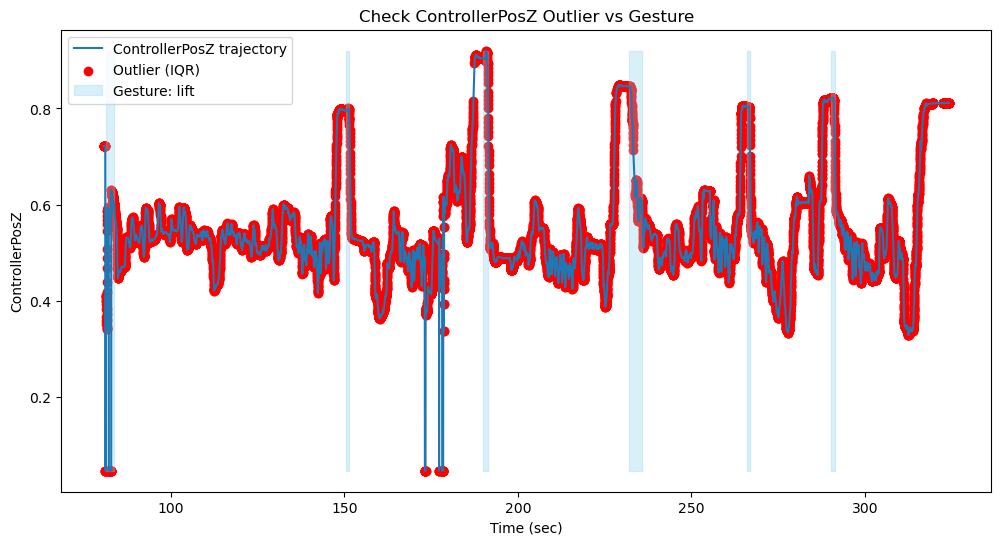

In [33]:
Q1 = df_selected['ControllerPosZ'].quantile(0.25)
Q3 = df_selected['ControllerPosZ'].quantile(0.75)
IQR = Q3 - Q1
outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

plt.figure(figsize=(12, 6))
plt.plot(df_selected['time_sec'], df_selected['ControllerPosZ'], label='ControllerPosZ trajectory')

plt.scatter(
    df_selected.loc[df_selected['ControllerPosZ'].between(outlier_upper, outlier_lower) == False, 'time_sec'],
    df_selected.loc[df_selected['ControllerPosZ'].between(outlier_upper, outlier_lower) == False, 'ControllerPosZ'],
    color='red', label='Outlier (IQR)'
)

plt.fill_between(
    df_selected['time_sec'], df_selected['ControllerPosZ'].min(), df_selected['ControllerPosZ'].max(),
    where=(df_selected['behavior'] == 'lift'),
    color='skyblue', alpha=0.3, label='Gesture: lift'
)

plt.legend()
plt.title('Check ControllerPosZ Outlier vs Gesture')
plt.xlabel('Time (sec)')
plt.ylabel('ControllerPosZ')
plt.show()

In [34]:
Q1 = df_selected['ControllerPosZ'].quantile(0.25)
Q3 = df_selected['ControllerPosZ'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'ControllerPosZ IQR: Q1={Q1:.4f}, Q3={Q3:.4f}, lower={lower_bound:.4f}, upper={upper_bound:.4f}')

df_outliers_low = df_selected[df_selected['ControllerPosZ'] < lower_bound]

print("\n=== Points where ControllerPosZ drops unusually low ===")
print(df_outliers_low[['time_sec', 'ControllerPosZ', 'behavior']])

# df_outliers_low.to_csv('ControllerPosZ_low_outliers.csv', index=False)
# print("\nSaved to: ControllerPosZ_low_outliers.csv")


ControllerPosZ IQR: Q1=0.4832, Q3=0.5739, lower=0.3471, upper=0.7099

=== Points where ControllerPosZ drops unusually low ===
       time_sec  ControllerPosZ behavior
28       81.100         0.04598    other
29       81.117         0.04598    other
30       81.133         0.04598    other
31       81.150         0.04598    other
32       81.167         0.04598    other
...         ...             ...      ...
19453   313.900         0.34540   adjust
19454   313.917         0.34566   adjust
19455   313.917         0.34566   adjust
19456   313.933         0.34708   adjust
19457   313.933         0.34708   adjust

[490 rows x 3 columns]


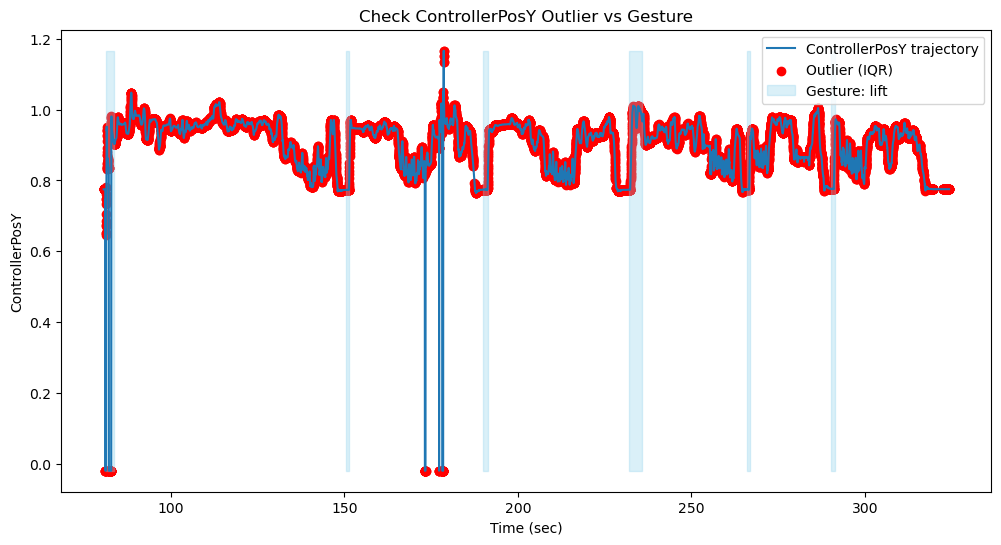

In [35]:
Q1 = df_selected['ControllerPosY'].quantile(0.25)
Q3 = df_selected['ControllerPosY'].quantile(0.75)
IQR = Q3 - Q1
outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

plt.figure(figsize=(12, 6))
plt.plot(df_selected['time_sec'], df_selected['ControllerPosY'], label='ControllerPosY trajectory')

plt.scatter(
    df_selected.loc[df_selected['ControllerPosY'].between(outlier_upper, outlier_lower) == False, 'time_sec'],
    df_selected.loc[df_selected['ControllerPosY'].between(outlier_upper, outlier_lower) == False, 'ControllerPosY'],
    color='red', label='Outlier (IQR)'
)

plt.fill_between(
    df_selected['time_sec'], df_selected['ControllerPosY'].min(), df_selected['ControllerPosY'].max(),
    where=(df_selected['behavior'] == 'lift'),
    color='skyblue', alpha=0.3, label='Gesture: lift'
)

plt.legend()
plt.title('Check ControllerPosY Outlier vs Gesture')
plt.xlabel('Time (sec)')
plt.ylabel('ControllerPosY')
plt.show()

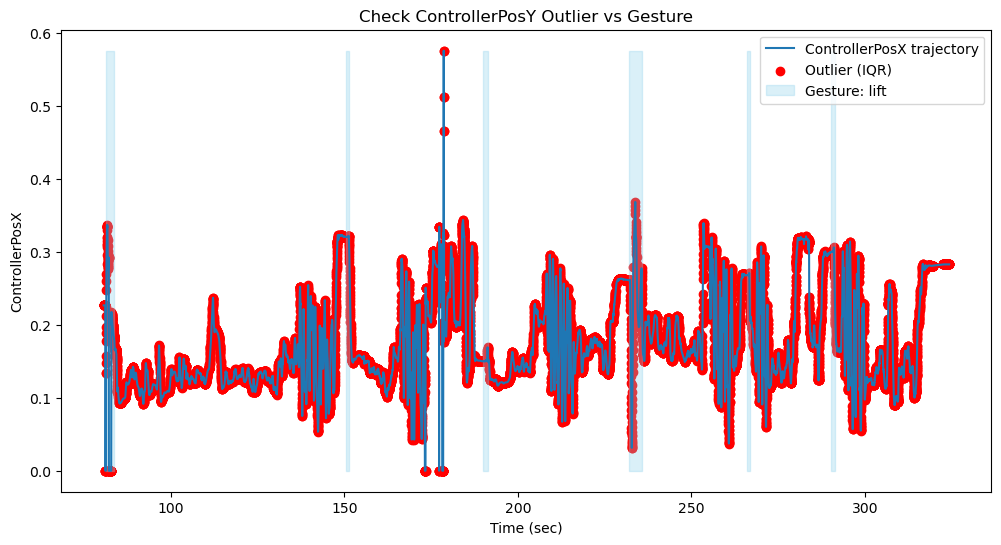

In [36]:
Q1 = df_selected['ControllerPosX'].quantile(0.25)
Q3 = df_selected['ControllerPosX'].quantile(0.75)
IQR = Q3 - Q1
outlier_lower = Q1 - 1.5 * IQR
outlier_upper = Q3 + 1.5 * IQR

plt.figure(figsize=(12, 6))
plt.plot(df_selected['time_sec'], df_selected['ControllerPosX'], label='ControllerPosX trajectory')

plt.scatter(
    df_selected.loc[df_selected['ControllerPosX'].between(outlier_upper, outlier_lower) == False, 'time_sec'],
    df_selected.loc[df_selected['ControllerPosX'].between(outlier_upper, outlier_lower) == False, 'ControllerPosX'],
    color='red', label='Outlier (IQR)'
)

plt.fill_between(
    df_selected['time_sec'], df_selected['ControllerPosX'].min(), df_selected['ControllerPosX'].max(),
    where=(df_selected['behavior'] == 'lift'),
    color='skyblue', alpha=0.3, label='Gesture: lift'
)

plt.legend()
plt.title('Check ControllerPosY Outlier vs Gesture')
plt.xlabel('Time (sec)')
plt.ylabel('ControllerPosX')
plt.show()

In [37]:
print(df_outliers_low[['time_sec', 'ControllerPosZ', 'behavior']].to_string())

       time_sec  ControllerPosZ behavior
28       81.100         0.04598    other
29       81.117         0.04598    other
30       81.133         0.04598    other
31       81.150         0.04598    other
32       81.167         0.04598    other
33       81.183         0.04598    other
34       81.200         0.04598    other
35       81.217         0.04598    other
36       81.233         0.04598    other
49       81.450         0.34601     lift
50       81.467         0.34053     lift
51       81.483         0.34009     lift
52       81.500         0.34216     lift
89       82.117         0.04598     lift
90       82.133         0.04598     lift
91       82.150         0.04598     lift
92       82.167         0.04598     lift
93       82.183         0.04598     lift
94       82.200         0.04598     lift
95       82.217         0.04598     lift
96       82.233         0.04598     lift
97       82.250         0.04598     lift
98       82.267         0.04598     lift
99       82.283 

In [38]:
controller_cols = [
    'ControllerPosX', 'ControllerPosY', 'ControllerPosZ',
    'ControllerRotX', 'ControllerRotY', 'ControllerRotZ', 'ControllerRotW'
]

headset_cols = [
    'HeadsetPosX', 'HeadsetPosY', 'HeadsetPosZ',
    'HeadsetRotX', 'HeadsetRotY', 'HeadsetRotZ', 'HeadsetRotW'
]

pose_cols = controller_cols + headset_cols

zero_summary = {}

for col in pose_cols:
    zero_mask = df_selected[col] == 0
    zero_count = zero_mask.sum()
    
    if zero_count > 0:
        zero_index = df_selected.loc[zero_mask].index.tolist()
    else:
        zero_index = []
    
    zero_summary[col] = {
        'zero_count': zero_count,
        'zero_index': zero_index
    }

print("\n==== Zero Value Summary ====")
for col, info in zero_summary.items():
    if info['zero_count'] > 0:
        print(f"{col}: {info['zero_count']} rows with zero, e.g., index {info['zero_index'][:5]}")
    else:
        print(f"{col}: OK (no zero)")

cols_with_zero = [col for col, info in zero_summary.items() if info['zero_count'] > 0]
print("\nColumns with zero pose values:", cols_with_zero)


==== Zero Value Summary ====
ControllerPosX: 118 rows with zero, e.g., index [28, 29, 30, 31, 32]
ControllerPosY: OK (no zero)
ControllerPosZ: OK (no zero)
ControllerRotX: OK (no zero)
ControllerRotY: 119 rows with zero, e.g., index [28, 29, 30, 31, 32]
ControllerRotZ: 118 rows with zero, e.g., index [28, 29, 30, 31, 32]
ControllerRotW: OK (no zero)
HeadsetPosX: 4 rows with zero, e.g., index [2898, 8326, 12565, 12577]
HeadsetPosY: OK (no zero)
HeadsetPosZ: OK (no zero)
HeadsetRotX: OK (no zero)
HeadsetRotY: OK (no zero)
HeadsetRotZ: 1 rows with zero, e.g., index [17478]
HeadsetRotW: OK (no zero)

Columns with zero pose values: ['ControllerPosX', 'ControllerRotY', 'ControllerRotZ', 'HeadsetPosX', 'HeadsetRotZ']


In [39]:
pose_cols = controller_cols + headset_cols

zero_pose_mask = (df_selected[pose_cols] == 0).sum(axis=1) >= 2

print(f"Rows with ≥2 pose columns = 0: {zero_pose_mask.sum()}")

nan_pose_mask = df_selected[pose_cols].isna().sum(axis=1) >= 2
print(f"Rows with ≥2 pose columns = NaN: {nan_pose_mask.sum()}")

df_selected_no_pose_dropout = df_selected.loc[~nan_pose_mask].copy()

print(f"Shape after dropping pose dropout rows: {df_selected_no_pose_dropout.shape}")

Rows with ≥2 pose columns = 0: 118
Rows with ≥2 pose columns = NaN: 29
Shape after dropping pose dropout rows: (20112, 85)


In [40]:
df_selected_no_pose_dropout

,dataset_id,frame,time_sec,hand,hand_detected,behavior,TimeSinceStartup,time_sec_offset,x_0,x_1,...,HeadsetRotY,HeadsetRotZ,HeadsetRotW,ControllerPosX,ControllerPosY,ControllerPosZ,ControllerRotX,ControllerRotY,ControllerRotZ,ControllerRotW
0,1,4838,80.633,Left,1,other,92.18940,80.62940,0.562638,0.523307,...,0.20110,-0.01786,0.96564,0.22639,0.77504,0.72136,-0.34772,-0.03732,0.00460,-0.93684
1,1,4839,80.650,Left,1,other,92.20361,80.64361,0.568650,0.525218,...,0.20111,-0.01779,0.96567,0.22639,0.77504,0.72136,-0.34772,-0.03732,0.00461,-0.93684
2,1,4840,80.667,Left,1,other,92.21703,80.65703,0.608788,0.557545,...,0.20105,-0.01759,0.96568,0.22639,0.77504,0.72136,-0.34772,-0.03732,0.00460,-0.93684
3,1,4841,80.683,Left,1,other,92.25182,80.69182,0.649046,0.593075,...,0.20096,-0.01766,0.96572,0.22639,0.77504,0.72136,-0.34772,-0.03732,0.00460,-0.93684
4,1,4842,80.700,Left,1,other,92.25182,80.69182,0.650377,0.594110,...,0.20096,-0.01766,0.96572,0.22639,0.77504,0.72136,-0.34772,-0.03732,0.00460,-0.93684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20107,1,19453,324.217,Left,1,other,335.77920,324.21920,0.296240,0.285624,...,-0.26694,0.00789,0.96072,0.28259,0.77546,0.81136,-0.34655,0.06789,-0.03239,-0.93501
20108,1,19454,324.233,Left,1,other,335.79450,324.23450,0.295995,0.285247,...,-0.26718,0.00787,0.96066,0.28259,0.77546,0.81136,-0.34655,0.06789,-0.03239,-0.93501
20109,1,19455,324.250,Left,1,other,335.80730,324.24730,0.293301,0.283557,...,-0.26722,0.00773,0.96065,0.28259,0.77546,0.81136,-0.34655,0.06789,-0.03239,-0.93501
20110,1,19456,324.267,Left,1,other,335.81960,324.25960,0.294158,0.283812,...,-0.26728,0.00756,0.96063,0.28259,0.77546,0.81136,-0.34655,0.06789,-0.03239,-0.93501


In [41]:
print(df_selected_no_pose_dropout.filter(like='x_').isna().sum().sum())
print(df_selected_no_pose_dropout.filter(like='y_').isna().sum().sum())
print(df_selected_no_pose_dropout.filter(like='z_').isna().sum().sum())

0
0
0


In [42]:
q_norm = (
    df_selected_no_pose_dropout['HeadsetRotX']**2 +
    df_selected_no_pose_dropout['HeadsetRotY']**2 +
    df_selected_no_pose_dropout['HeadsetRotZ']**2 +
    df_selected_no_pose_dropout['HeadsetRotW']**2
)
print(q_norm.describe())

count    20112.000000
mean         1.000000
std          0.000006
min          0.999987
25%          0.999995
50%          1.000000
75%          1.000005
max          1.000014
dtype: float64


In [43]:
print(df_selected_no_pose_dropout.shape)
print(df_selected_no_pose_dropout['behavior'].value_counts())

(20112, 85)
behavior
hold      6547
adjust    5016
rotate    3670
press     1815
other     1510
place      914
lift       640
Name: count, dtype: int64


In [44]:
for i in range(21):
    df_selected_no_pose_dropout[f'x_world_{i}'] = np.nan
    df_selected_no_pose_dropout[f'y_world_{i}'] = np.nan
    df_selected_no_pose_dropout[f'z_world_{i}'] = np.nan

for idx, row in df_selected_no_pose_dropout.iterrows():
    q = [
        row['HeadsetRotX'],
        row['HeadsetRotY'],
        row['HeadsetRotZ'],
        row['HeadsetRotW']
    ]
    headset_pos = np.array([
        row['HeadsetPosX'],
        row['HeadsetPosY'],
        row['HeadsetPosZ']
    ])
    
    if np.isnan(q).any() or np.isnan(headset_pos).any():
        continue 

    rot = R.from_quat(q)

    for i in range(21):
        l_local = np.array([
            row[f'x_{i}'],
            row[f'y_{i}'],
            row[f'z_{i}']
        ])

        if np.isnan(l_local).any():
            continue
        
        l_rotated = rot.apply(l_local)
        
        l_world = l_rotated + headset_pos
        
        df_selected_no_pose_dropout.at[idx, f'x_world_{i}'] = l_world[0]
        df_selected_no_pose_dropout.at[idx, f'y_world_{i}'] = l_world[1]
        df_selected_no_pose_dropout.at[idx, f'z_world_{i}'] = l_world[2]

print("Transform landmark → world coordinate complete!")

Transform landmark → world coordinate complete!


==== NaN Count per World Landmark ====
x_world_0: 0 NaN
y_world_0: 0 NaN
z_world_0: 0 NaN
x_world_1: 0 NaN
y_world_1: 0 NaN
z_world_1: 0 NaN
x_world_2: 0 NaN
y_world_2: 0 NaN
z_world_2: 0 NaN
x_world_3: 0 NaN
y_world_3: 0 NaN
z_world_3: 0 NaN
x_world_4: 0 NaN
y_world_4: 0 NaN
z_world_4: 0 NaN
x_world_5: 0 NaN
y_world_5: 0 NaN
z_world_5: 0 NaN
x_world_6: 0 NaN
y_world_6: 0 NaN
z_world_6: 0 NaN
x_world_7: 0 NaN
y_world_7: 0 NaN
z_world_7: 0 NaN
x_world_8: 0 NaN
y_world_8: 0 NaN
z_world_8: 0 NaN
x_world_9: 0 NaN
y_world_9: 0 NaN
z_world_9: 0 NaN
x_world_10: 0 NaN
y_world_10: 0 NaN
z_world_10: 0 NaN
x_world_11: 0 NaN
y_world_11: 0 NaN
z_world_11: 0 NaN
x_world_12: 0 NaN
y_world_12: 0 NaN
z_world_12: 0 NaN
x_world_13: 0 NaN
y_world_13: 0 NaN
z_world_13: 0 NaN
x_world_14: 0 NaN
y_world_14: 0 NaN
z_world_14: 0 NaN
x_world_15: 0 NaN
y_world_15: 0 NaN
z_world_15: 0 NaN
x_world_16: 0 NaN
y_world_16: 0 NaN
z_world_16: 0 NaN
x_world_17: 0 NaN
y_world_17: 0 NaN
z_world_17: 0 NaN
x_world_18: 0 NaN
y

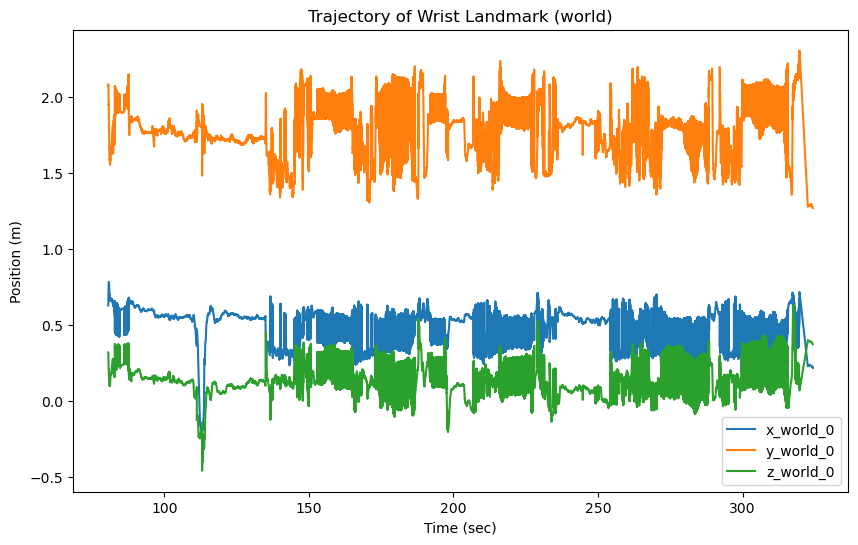

In [45]:
nan_summary = {}
for i in range(21):
    for axis in ['x', 'y', 'z']:
        col = f'{axis}_world_{i}'
        nan_count = df_selected_no_pose_dropout[col].isna().sum()
        nan_summary[col] = nan_count

print("==== NaN Count per World Landmark ====")
for col, count in nan_summary.items():
    print(f"{col}: {count} NaN")

print("\n==== Descriptive Stats ====")
world_cols = [f'{axis}_world_{i}' for i in range(21) for axis in ['x', 'y', 'z']]
print(df_selected_no_pose_dropout[world_cols].describe().transpose())

plt.figure(figsize=(10, 6))
plt.plot(df_selected_no_pose_dropout['time_sec'], df_selected_no_pose_dropout['x_world_0'], label='x_world_0')
plt.plot(df_selected_no_pose_dropout['time_sec'], df_selected_no_pose_dropout['y_world_0'], label='y_world_0')
plt.plot(df_selected_no_pose_dropout['time_sec'], df_selected_no_pose_dropout['z_world_0'], label='z_world_0')

plt.title("Trajectory of Wrist Landmark (world)")
plt.xlabel("Time (sec)")
plt.ylabel("Position (m)")
plt.legend()
plt.show()

In [46]:
wrist_x = 'x_world_0'
wrist_y = 'y_world_0'
wrist_z = 'z_world_0'

for i in range(21):
    for axis in ['x', 'y', 'z']:
        col = f'{axis}_world_{i}'
        rel_col = f'{axis}_world_{i}_rel'
        wrist_col = f'{axis}_world_0'
        df_selected_no_pose_dropout[rel_col] = (
            df_selected_no_pose_dropout[col] - df_selected_no_pose_dropout[wrist_col]
        )

print("Wrist-relative features done.")


pairs = [(0, 8), (0, 4)]

for p1, p2 in pairs:
    dist_name = f'dist_{p1}_{p2}'
    dx = df_selected_no_pose_dropout[f'x_world_{p1}'] - df_selected_no_pose_dropout[f'x_world_{p2}']
    dy = df_selected_no_pose_dropout[f'y_world_{p1}'] - df_selected_no_pose_dropout[f'y_world_{p2}']
    dz = df_selected_no_pose_dropout[f'z_world_{p1}'] - df_selected_no_pose_dropout[f'z_world_{p2}']
    df_selected_no_pose_dropout[dist_name] = np.sqrt(dx**2 + dy**2 + dz**2)

print("Pairwise distances done.")

vec_x = df_selected_no_pose_dropout['x_world_8'] - df_selected_no_pose_dropout['x_world_0']
vec_y = df_selected_no_pose_dropout['y_world_8'] - df_selected_no_pose_dropout['y_world_0']
vec_z = df_selected_no_pose_dropout['z_world_8'] - df_selected_no_pose_dropout['z_world_0']

vec = np.vstack([vec_x, vec_y, vec_z]).T
z_axis = np.array([0, 0, 1])

# Normalize vector
vec_norm = np.linalg.norm(vec, axis=1)
dot_prod = vec[:, 2]  # z component เพราะ Z-axis = [0,0,1]

cos_theta = dot_prod / vec_norm  # dot(vec, z_axis) / (||vec|| * ||z_axis||)
cos_theta = np.clip(cos_theta, -1.0, 1.0)  

df_selected_no_pose_dropout['angle_wrist_index_z'] = np.arccos(cos_theta) * 180 / np.pi

print("Vector angle done.")

df_selected_no_pose_dropout['x_world_0_delta'] = df_selected_no_pose_dropout['x_world_0'].diff()
df_selected_no_pose_dropout['x_world_0_speed'] = (
    df_selected_no_pose_dropout['x_world_0_delta'] /
    df_selected_no_pose_dropout['time_sec'].diff()
).fillna(0)

print("Delta & speed done.")

print("Feature Engineering complete!")
print(f"New columns: {df_selected_no_pose_dropout.columns[-10:].tolist()}")

Wrist-relative features done.
Pairwise distances done.
Vector angle done.
Delta & speed done.
Feature Engineering complete!
New columns: ['y_world_19_rel', 'z_world_19_rel', 'x_world_20_rel', 'y_world_20_rel', 'z_world_20_rel', 'dist_0_8', 'dist_0_4', 'angle_wrist_index_z', 'x_world_0_delta', 'x_world_0_speed']


/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31387/3501812344.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_selected_no_pose_dropout[rel_col] = (
/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31387/3501812344.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_selected_no_pose_dropout[rel_col] = (
/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31387/3501812344.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

==== NaN Count per FE column ====
x_world_0_delta    1
dtype: int64

==== Descriptive Stats of FE ====
                       count        mean        std        min         25%  \
x_world_0_rel        20112.0    0.000000   0.000000   0.000000    0.000000   
y_world_0_rel        20112.0    0.000000   0.000000   0.000000    0.000000   
z_world_0_rel        20112.0    0.000000   0.000000   0.000000    0.000000   
x_world_1_rel        20112.0    0.012896   0.031767  -0.072210   -0.007805   
y_world_1_rel        20112.0   -0.012063   0.045948  -0.116597   -0.044112   
...                      ...         ...        ...        ...         ...   
dist_0_8             20112.0    0.251613   0.107147   0.016012    0.150519   
dist_0_4             20112.0    0.228877   0.081844   0.006819    0.158533   
angle_wrist_index_z  20112.0  113.178507  14.522252  23.236096  106.503974   
x_world_0_delta      20111.0   -0.000020   0.173869  -0.480343   -0.009293   
x_world_0_speed      20112.0         Na

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


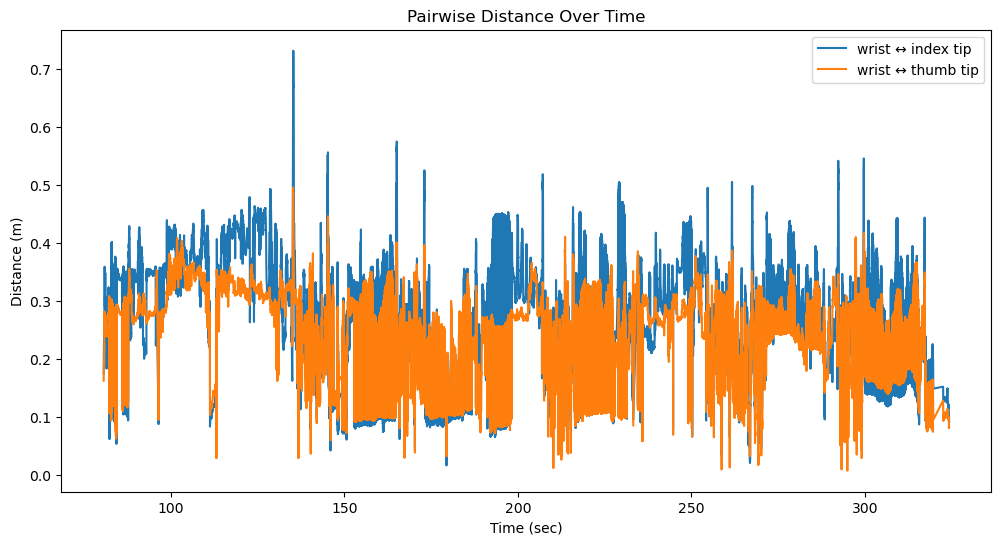

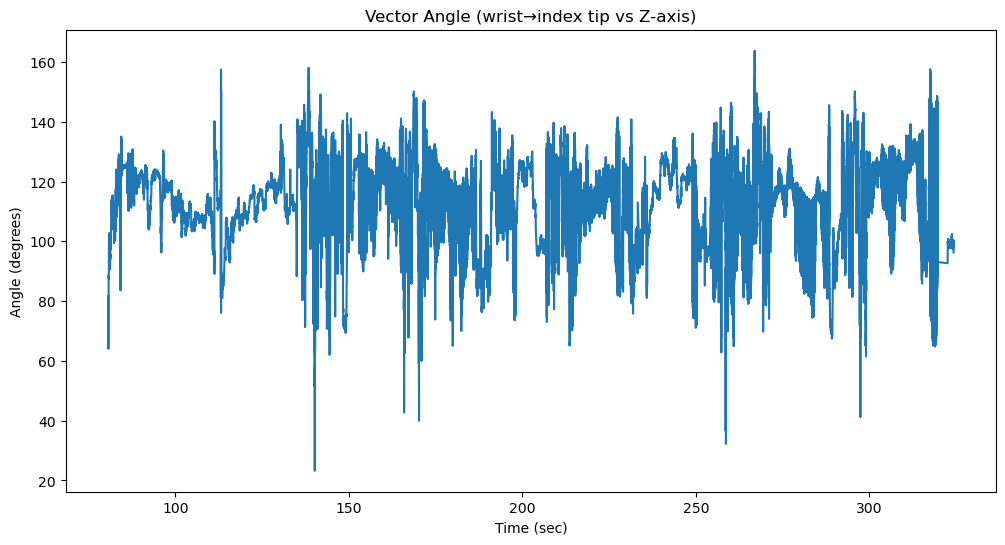

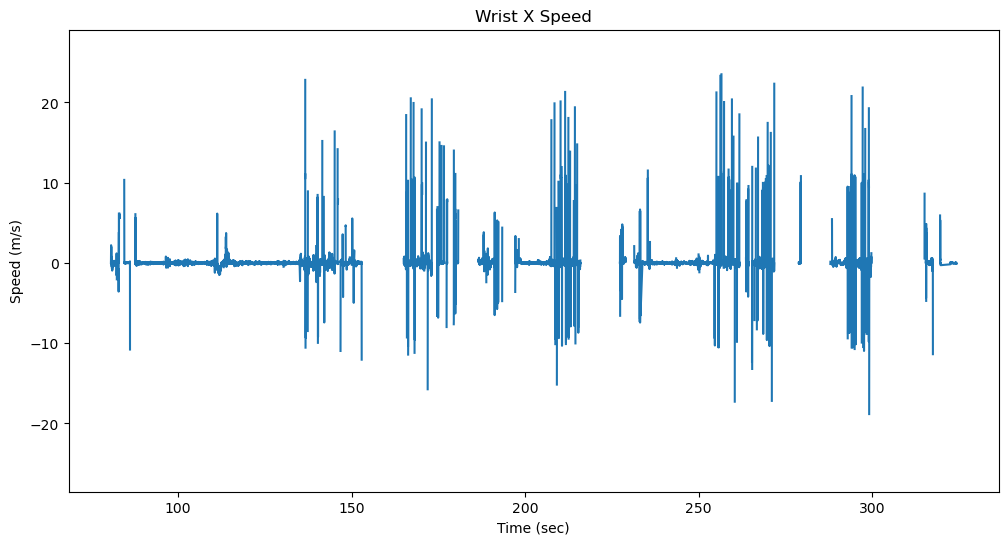

In [47]:
fe_cols = []

# Wrist-relative
for i in range(21):
    for axis in ['x', 'y', 'z']:
        fe_cols.append(f'{axis}_world_{i}_rel')

fe_cols += ['dist_0_8', 'dist_0_4']

fe_cols += ['angle_wrist_index_z']

fe_cols += ['x_world_0_delta', 'x_world_0_speed']

nan_counts = df_selected_no_pose_dropout[fe_cols].isna().sum()

print("==== NaN Count per FE column ====")
print(nan_counts[nan_counts > 0])

print("\n==== Descriptive Stats of FE ====")
print(df_selected_no_pose_dropout[fe_cols].describe().transpose())

print("\n==== Logic Check ====")

for col in ['dist_0_8', 'dist_0_4']:
    if (df_selected_no_pose_dropout[col] < 0).sum() > 0:
        print(f"{col} has negative values!")

# Angle > 180?
if (df_selected_no_pose_dropout['angle_wrist_index_z'] > 180).sum() > 0:
    print("angle_wrist_index_z > 180 degrees detected!")

if df_selected_no_pose_dropout['x_world_0_speed'].abs().max() > 10:
    print("Speed might be too high!")

plt.figure(figsize=(12,6))
plt.plot(df_selected_no_pose_dropout['time_sec'], df_selected_no_pose_dropout['dist_0_8'], label='wrist ↔ index tip')
plt.plot(df_selected_no_pose_dropout['time_sec'], df_selected_no_pose_dropout['dist_0_4'], label='wrist ↔ thumb tip')
plt.title("Pairwise Distance Over Time")
plt.xlabel("Time (sec)")
plt.ylabel("Distance (m)")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df_selected_no_pose_dropout['time_sec'], df_selected_no_pose_dropout['angle_wrist_index_z'])
plt.title("Vector Angle (wrist→index tip vs Z-axis)")
plt.xlabel("Time (sec)")
plt.ylabel("Angle (degrees)")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df_selected_no_pose_dropout['time_sec'], df_selected_no_pose_dropout['x_world_0_speed'])
plt.title("Wrist X Speed")
plt.xlabel("Time (sec)")
plt.ylabel("Speed (m/s)")
plt.show()

In [48]:
df_selected_no_pose_dropout['x_world_0_delta'] = df_selected_no_pose_dropout['x_world_0_delta'].fillna(0)

df_selected_no_pose_dropout

,dataset_id,frame,time_sec,hand,hand_detected,behavior,TimeSinceStartup,time_sec_offset,x_0,x_1,...,y_world_19_rel,z_world_19_rel,x_world_20_rel,y_world_20_rel,z_world_20_rel,dist_0_8,dist_0_4,angle_wrist_index_z,x_world_0_delta,x_world_0_speed
0,1,4838,80.633,Left,1,other,92.18940,80.62940,0.562638,0.523307,...,-0.121356,0.040743,-0.074068,-0.111524,0.049403,0.174389,0.161927,81.669045,0.000000,0.000000
1,1,4839,80.650,Left,1,other,92.20361,80.64361,0.568650,0.525218,...,-0.122464,0.042428,-0.086045,-0.108392,0.052380,0.178628,0.170702,81.474466,0.005676,0.333865
2,1,4840,80.667,Left,1,other,92.21703,80.65703,0.608788,0.557545,...,-0.129981,0.089903,-0.059275,-0.121275,0.104165,0.215436,0.169666,71.741501,0.036781,2.163588
3,1,4841,80.683,Left,1,other,92.25182,80.69182,0.649046,0.593075,...,-0.074547,0.105801,-0.082892,-0.044447,0.117799,0.215637,0.180589,64.765414,0.035362,2.210156
4,1,4842,80.700,Left,1,other,92.25182,80.69182,0.650377,0.594110,...,-0.073998,0.116200,-0.083647,-0.045076,0.126918,0.221941,0.183075,64.064160,0.001397,0.082186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20107,1,19453,324.217,Left,1,other,335.77920,324.21920,0.296240,0.285624,...,-0.076693,0.004418,0.052514,-0.086651,0.005648,0.105055,0.085552,100.028927,-0.001560,-0.091749
20108,1,19454,324.233,Left,1,other,335.79450,324.23450,0.295995,0.285247,...,-0.073419,0.005789,0.051010,-0.083519,0.006929,0.098665,0.080393,100.212149,-0.000171,-0.010689
20109,1,19455,324.250,Left,1,other,335.80730,324.24730,0.293301,0.283557,...,-0.068494,0.008068,0.048634,-0.077373,0.009004,0.101455,0.081317,98.132116,-0.002035,-0.119718
20110,1,19456,324.267,Left,1,other,335.81960,324.25960,0.294158,0.283812,...,-0.070732,0.006202,0.048218,-0.080971,0.006596,0.100907,0.080303,99.339491,0.000830,0.048850


In [49]:
for col in df_selected_no_pose_dropout:
    print(col)

dataset_id
frame
time_sec
hand
hand_detected
behavior
TimeSinceStartup
time_sec_offset
x_0
x_1
x_2
x_3
x_4
x_5
x_6
x_7
x_8
x_9
x_10
x_11
x_12
x_13
x_14
x_15
x_16
x_17
x_18
x_19
x_20
y_0
y_1
y_2
y_3
y_4
y_5
y_6
y_7
y_8
y_9
y_10
y_11
y_12
y_13
y_14
y_15
y_16
y_17
y_18
y_19
y_20
z_0
z_1
z_2
z_3
z_4
z_5
z_6
z_7
z_8
z_9
z_10
z_11
z_12
z_13
z_14
z_15
z_16
z_17
z_18
z_19
z_20
HeadsetPosX
HeadsetPosY
HeadsetPosZ
HeadsetRotX
HeadsetRotY
HeadsetRotZ
HeadsetRotW
ControllerPosX
ControllerPosY
ControllerPosZ
ControllerRotX
ControllerRotY
ControllerRotZ
ControllerRotW
x_world_0
y_world_0
z_world_0
x_world_1
y_world_1
z_world_1
x_world_2
y_world_2
z_world_2
x_world_3
y_world_3
z_world_3
x_world_4
y_world_4
z_world_4
x_world_5
y_world_5
z_world_5
x_world_6
y_world_6
z_world_6
x_world_7
y_world_7
z_world_7
x_world_8
y_world_8
z_world_8
x_world_9
y_world_9
z_world_9
x_world_10
y_world_10
z_world_10
x_world_11
y_world_11
z_world_11
x_world_12
y_world_12
z_world_12
x_world_13
y_world_13
z_world_13
x_world

In [50]:
dx = df_selected_no_pose_dropout['x_world_4'] - df_selected_no_pose_dropout['x_world_8']
dy = df_selected_no_pose_dropout['y_world_4'] - df_selected_no_pose_dropout['y_world_8']
dz = df_selected_no_pose_dropout['z_world_4'] - df_selected_no_pose_dropout['z_world_8']
df_selected_no_pose_dropout['dist_4_8'] = np.sqrt(dx**2 + dy**2 + dz**2)

dx = df_selected_no_pose_dropout['x_world_8'] - df_selected_no_pose_dropout['x_world_12']
dy = df_selected_no_pose_dropout['y_world_8'] - df_selected_no_pose_dropout['y_world_12']
dz = df_selected_no_pose_dropout['z_world_8'] - df_selected_no_pose_dropout['z_world_12']
df_selected_no_pose_dropout['dist_8_12'] = np.sqrt(dx**2 + dy**2 + dz**2)

print("Pairwise distance dist_4_8 and dist_8_12 done.")

vec_x = df_selected_no_pose_dropout['x_world_4'] - df_selected_no_pose_dropout['x_world_0']
vec_y = df_selected_no_pose_dropout['y_world_4'] - df_selected_no_pose_dropout['y_world_0']
vec_z = df_selected_no_pose_dropout['z_world_4'] - df_selected_no_pose_dropout['z_world_0']

vec = np.vstack([vec_x, vec_y, vec_z]).T
z_axis = np.array([0, 0, 1])

vec_norm = np.linalg.norm(vec, axis=1)
dot_prod = vec[:, 2] 

cos_theta = dot_prod / vec_norm
cos_theta = np.clip(cos_theta, -1.0, 1.0)  

df_selected_no_pose_dropout['angle_wrist_thumb_z'] = np.arccos(cos_theta) * 180 / np.pi

print("Vector angle wrist → thumb vs Z-axis done.")

df_selected_no_pose_dropout['y_world_0_delta'] = df_selected_no_pose_dropout['y_world_0'].diff()
df_selected_no_pose_dropout['z_world_0_delta'] = df_selected_no_pose_dropout['z_world_0'].diff()

df_selected_no_pose_dropout['y_world_0_speed'] = (
    df_selected_no_pose_dropout['y_world_0_delta'] /
    df_selected_no_pose_dropout['time_sec'].diff()
).replace([np.inf, -np.inf], np.nan).fillna(0)

df_selected_no_pose_dropout['z_world_0_speed'] = (
    df_selected_no_pose_dropout['z_world_0_delta'] /
    df_selected_no_pose_dropout['time_sec'].diff()
).replace([np.inf, -np.inf], np.nan).fillna(0)

print("Delta & Speed Y/Z done.")
print("All additional features complete!")

Pairwise distance dist_4_8 and dist_8_12 done.
Vector angle wrist → thumb vs Z-axis done.
Delta & Speed Y/Z done.
All additional features complete!


/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31387/2509540752.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_selected_no_pose_dropout['dist_4_8'] = np.sqrt(dx**2 + dy**2 + dz**2)
/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31387/2509540752.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_selected_no_pose_dropout['dist_8_12'] = np.sqrt(dx**2 + dy**2 + dz**2)
/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31387/2509540752.py:31: PerformanceWarning: DataFrame is highly fragmen

In [51]:
df_selected_no_pose_dropout['x_world_0_speed'] = df_selected_no_pose_dropout['x_world_0_speed'].fillna(0)
df_selected_no_pose_dropout['x_world_0_speed'] = df_selected_no_pose_dropout['x_world_0_speed'].fillna(0)

df_selected_no_pose_dropout

,dataset_id,frame,time_sec,hand,hand_detected,behavior,TimeSinceStartup,time_sec_offset,x_0,x_1,...,angle_wrist_index_z,x_world_0_delta,x_world_0_speed,dist_4_8,dist_8_12,angle_wrist_thumb_z,y_world_0_delta,z_world_0_delta,y_world_0_speed,z_world_0_speed
0,1,4838,80.633,Left,1,other,92.18940,80.62940,0.562638,0.523307,...,81.669045,0.000000,0.000000,0.029799,0.020050,85.999551,NaN,NaN,0.000000,0.000000
1,1,4839,80.650,Left,1,other,92.20361,80.64361,0.568650,0.525218,...,81.474466,0.005676,0.333865,0.021767,0.021740,86.469061,0.004328,-0.001315,0.254578,-0.077358
2,1,4840,80.667,Left,1,other,92.21703,80.65703,0.608788,0.557545,...,71.741501,0.036781,2.163588,0.132988,0.042278,72.510822,0.004235,-0.014626,0.249117,-0.860368
3,1,4841,80.683,Left,1,other,92.25182,80.69182,0.649046,0.593075,...,64.765414,0.035362,2.210156,0.114211,0.094072,65.740740,-0.014488,-0.021161,-0.905496,-1.322568
4,1,4842,80.700,Left,1,other,92.25182,80.69182,0.650377,0.594110,...,64.064160,0.001397,0.082186,0.120026,0.088739,64.644857,0.001695,0.000014,0.099686,0.000849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20107,1,19453,324.217,Left,1,other,335.77920,324.21920,0.296240,0.285624,...,100.028927,-0.001560,-0.091749,0.023719,0.012909,103.716969,-0.001741,-0.001338,-0.102418,-0.078735
20108,1,19454,324.233,Left,1,other,335.79450,324.23450,0.295995,0.285247,...,100.212149,-0.000171,-0.010689,0.021675,0.014427,103.688844,-0.000742,-0.000155,-0.046354,-0.009697
20109,1,19455,324.250,Left,1,other,335.80730,324.24730,0.293301,0.283557,...,98.132116,-0.002035,-0.119718,0.025077,0.013052,103.196799,-0.003001,-0.001894,-0.176519,-0.111387
20110,1,19456,324.267,Left,1,other,335.81960,324.25960,0.294158,0.283812,...,99.339491,0.000830,0.048850,0.023480,0.013980,102.927102,-0.000026,0.000433,-0.001533,0.025452


In [52]:
df_selected_no_pose_dropout.describe()

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,dataset_id,frame,time_sec,hand_detected,TimeSinceStartup,time_sec_offset,x_0,x_1,x_2,x_3,...,angle_wrist_index_z,x_world_0_delta,x_world_0_speed,dist_4_8,dist_8_12,angle_wrist_thumb_z,y_world_0_delta,z_world_0_delta,y_world_0_speed,z_world_0_speed
count,20112.0,20112.000000,20112.000000,20112.0,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,...,20112.000000,20112.000000,2.011200e+04,20112.000000,20112.000000,20112.000000,20111.000000,20111.000000,20112.000000,20112.000000
mean,1.0,12557.844968,209.297416,1.0,220.857439,209.297439,0.485602,0.517821,0.543421,0.554845,...,113.178507,-0.000020,NaN,0.076207,0.077343,118.139774,-0.000040,0.000003,-1.695935,-2.254708
std,0.0,4110.538494,68.508975,0.0,68.508940,68.508940,0.157818,0.145889,0.140334,0.135054,...,14.522252,0.173865,NaN,0.047903,0.062552,16.288106,0.201838,0.174701,7.422113,6.188093
min,1.0,4838.000000,80.633000,1.0,92.189400,80.629400,0.081359,0.131138,0.166266,0.193476,...,23.236096,-0.480343,-inf,0.002652,0.002115,18.862593,-1.017681,-0.408074,-46.763024,-25.240167
25%,1.0,9342.750000,155.712750,1.0,167.268900,155.708900,0.341403,0.390695,0.424353,0.433460,...,106.503974,-0.009287,-5.868770e-01,0.036443,0.025864,111.040552,-0.021908,-0.012528,-0.169913,-0.148927
50%,1.0,12643.500000,210.725000,1.0,222.286250,210.726250,0.564726,0.583930,0.592052,0.579911,...,115.583739,-0.000003,-1.654626e-04,0.074204,0.052810,121.631125,0.000035,-0.000012,0.000000,0.000000
75%,1.0,16340.000000,272.333000,1.0,283.888900,272.328900,0.612543,0.641228,0.664203,0.673229,...,122.586416,0.010857,6.669611e-01,0.096565,0.122593,128.363592,0.022265,0.010948,0.047731,0.014380
max,1.0,19457.000000,324.283000,1.0,335.847200,324.287200,0.786857,0.776391,0.810150,0.822483,...,163.813295,0.425631,inf,0.354333,0.281574,155.870615,0.753486,0.404994,41.522603,24.462193


In [53]:
numeric_cols = df_selected_no_pose_dropout.select_dtypes(include=[np.number])

inf_counts = np.isinf(numeric_cols).sum()
inf_counts = inf_counts[inf_counts > 0]

print("\n==== Inf Count per Numeric Column ====")
if not inf_counts.empty:
    print(inf_counts)
else:
    print(" No inf detected in numeric columns!")


==== Inf Count per Numeric Column ====
x_world_0_speed    5848
dtype: int64


In [54]:
df_selected_no_pose_dropout['x_world_0_speed'] = (
    df_selected_no_pose_dropout['x_world_0_speed']
    .replace([np.inf, -np.inf], np.nan)
    .fillna(0)
)

print("x_world_0_speed: inf replaced and NaN filled with 0.")

x_world_0_speed: inf replaced and NaN filled with 0.


In [55]:
df_selected_no_pose_dropout

,dataset_id,frame,time_sec,hand,hand_detected,behavior,TimeSinceStartup,time_sec_offset,x_0,x_1,...,angle_wrist_index_z,x_world_0_delta,x_world_0_speed,dist_4_8,dist_8_12,angle_wrist_thumb_z,y_world_0_delta,z_world_0_delta,y_world_0_speed,z_world_0_speed
0,1,4838,80.633,Left,1,other,92.18940,80.62940,0.562638,0.523307,...,81.669045,0.000000,0.000000,0.029799,0.020050,85.999551,NaN,NaN,0.000000,0.000000
1,1,4839,80.650,Left,1,other,92.20361,80.64361,0.568650,0.525218,...,81.474466,0.005676,0.333865,0.021767,0.021740,86.469061,0.004328,-0.001315,0.254578,-0.077358
2,1,4840,80.667,Left,1,other,92.21703,80.65703,0.608788,0.557545,...,71.741501,0.036781,2.163588,0.132988,0.042278,72.510822,0.004235,-0.014626,0.249117,-0.860368
3,1,4841,80.683,Left,1,other,92.25182,80.69182,0.649046,0.593075,...,64.765414,0.035362,2.210156,0.114211,0.094072,65.740740,-0.014488,-0.021161,-0.905496,-1.322568
4,1,4842,80.700,Left,1,other,92.25182,80.69182,0.650377,0.594110,...,64.064160,0.001397,0.082186,0.120026,0.088739,64.644857,0.001695,0.000014,0.099686,0.000849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20107,1,19453,324.217,Left,1,other,335.77920,324.21920,0.296240,0.285624,...,100.028927,-0.001560,-0.091749,0.023719,0.012909,103.716969,-0.001741,-0.001338,-0.102418,-0.078735
20108,1,19454,324.233,Left,1,other,335.79450,324.23450,0.295995,0.285247,...,100.212149,-0.000171,-0.010689,0.021675,0.014427,103.688844,-0.000742,-0.000155,-0.046354,-0.009697
20109,1,19455,324.250,Left,1,other,335.80730,324.24730,0.293301,0.283557,...,98.132116,-0.002035,-0.119718,0.025077,0.013052,103.196799,-0.003001,-0.001894,-0.176519,-0.111387
20110,1,19456,324.267,Left,1,other,335.81960,324.25960,0.294158,0.283812,...,99.339491,0.000830,0.048850,0.023480,0.013980,102.927102,-0.000026,0.000433,-0.001533,0.025452


In [56]:
df_selected_no_pose_dropout['y_world_0_delta'] = (
    df_selected_no_pose_dropout['y_world_0_delta']
    .replace([np.inf, -np.inf], np.nan)
    .fillna(0)
)

In [57]:
df_selected_no_pose_dropout['z_world_0_delta'] = (
    df_selected_no_pose_dropout['z_world_0_delta']
    .replace([np.inf, -np.inf], np.nan)
    .fillna(0)
)

In [58]:
df_selected_no_pose_dropout.describe()

,dataset_id,frame,time_sec,hand_detected,TimeSinceStartup,time_sec_offset,x_0,x_1,x_2,x_3,...,angle_wrist_index_z,x_world_0_delta,x_world_0_speed,dist_4_8,dist_8_12,angle_wrist_thumb_z,y_world_0_delta,z_world_0_delta,y_world_0_speed,z_world_0_speed
count,20112.0,20112.000000,20112.000000,20112.0,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,...,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000,20112.000000
mean,1.0,12557.844968,209.297416,1.0,220.857439,209.297439,0.485602,0.517821,0.543421,0.554845,...,113.178507,-0.000020,2.257904,0.076207,0.077343,118.139774,-0.000040,0.000003,-1.695935,-2.254708
std,0.0,4110.538494,68.508975,0.0,68.508940,68.508940,0.157818,0.145889,0.140334,0.135054,...,14.522252,0.173865,6.149401,0.047903,0.062552,16.288106,0.201833,0.174697,7.422113,6.188093
min,1.0,4838.000000,80.633000,1.0,92.189400,80.629400,0.081359,0.131138,0.166266,0.193476,...,23.236096,-0.480343,-25.887444,0.002652,0.002115,18.862593,-1.017681,-0.408074,-46.763024,-25.240167
25%,1.0,9342.750000,155.712750,1.0,167.268900,155.708900,0.341403,0.390695,0.424353,0.433460,...,106.503974,-0.009287,-0.012181,0.036443,0.025864,111.040552,-0.021906,-0.012515,-0.169913,-0.148927
50%,1.0,12643.500000,210.725000,1.0,222.286250,210.726250,0.564726,0.583930,0.592052,0.579911,...,115.583739,-0.000003,0.000000,0.074204,0.052810,121.631125,0.000035,-0.000012,0.000000,0.000000
75%,1.0,16340.000000,272.333000,1.0,283.888900,272.328900,0.612543,0.641228,0.664203,0.673229,...,122.586416,0.010857,0.126981,0.096565,0.122593,128.363592,0.022262,0.010947,0.047731,0.014380
max,1.0,19457.000000,324.283000,1.0,335.847200,324.287200,0.786857,0.776391,0.810150,0.822483,...,163.813295,0.425631,26.440161,0.354333,0.281574,155.870615,0.753486,0.404994,41.522603,24.462193


In [59]:
nan_counts = df_selected_no_pose_dropout.isna().sum()
nan_cols = nan_counts[nan_counts > 0]

print("\n==== NaN Count per Column ====")
if nan_cols.empty:
    print("No NaN detected!")
else:
    print(nan_cols)

numeric_cols = df_selected_no_pose_dropout.select_dtypes(include=[np.number])
inf_counts = np.isinf(numeric_cols).sum()
inf_cols = inf_counts[inf_counts > 0]

print("\n==== Inf Count per Numeric Column ====")
if inf_cols.empty:
    print("No inf detected!")
else:
    print(inf_cols)

if 'FrameNumber' in df_selected_no_pose_dropout.columns:
    duplicate_frames = df_selected_no_pose_dropout['FrameNumber'].duplicated().sum()
    print(f"\n==== Duplicate FrameNumber: {duplicate_frames}")
elif 'frame' in df_selected_no_pose_dropout.columns:
    duplicate_frames = df_selected_no_pose_dropout['frame'].duplicated().sum()
    print(f"\n==== Duplicate frame: {duplicate_frames}")
else:
    print("\nno column FrameNumber or frame check duplicate!")


print("\nFinal QC Check Complete.")


==== NaN Count per Column ====
No NaN detected!

==== Inf Count per Numeric Column ====
No inf detected!

==== Duplicate frame: 5848

Final QC Check Complete.


In [60]:
mask_zero = (
    (df_selected_no_pose_dropout['time_sec'] >= 150) &
    (df_selected_no_pose_dropout['time_sec'] <= 200) &
    (
        (df_selected_no_pose_dropout['ControllerPosX'] == 0) |
        (df_selected_no_pose_dropout['ControllerPosY'] == 0) |
        (df_selected_no_pose_dropout['ControllerPosZ'] == 0)
    )
)

df_zero_pos = df_selected_no_pose_dropout.loc[mask_zero,
                    ['frame', 'time_sec',
                     'ControllerPosX', 'ControllerPosY', 'ControllerPosZ',
                     'behavior']]

print(df_zero_pos)

      frame  time_sec  ControllerPosX  ControllerPosY  ControllerPosZ behavior
6748  10391   173.183             0.0        -0.01964         0.04598   rotate
6749  10391   173.183             0.0        -0.01964         0.04598   rotate
6750  10392   173.200             0.0        -0.01964         0.04598   rotate
6751  10392   173.200             0.0        -0.01964         0.04598   rotate
6752  10393   173.217             0.0        -0.01964         0.04598   rotate
...     ...       ...             ...             ...             ...      ...
7293  10706   178.433             0.0        -0.01964         0.04598     hold
7294  10707   178.450             0.0        -0.01964         0.04598     hold
7295  10707   178.450             0.0        -0.01964         0.04598     hold
7296  10708   178.467             0.0        -0.01964         0.04598     hold
7297  10708   178.467             0.0        -0.01964         0.04598     hold

[66 rows x 6 columns]


In [61]:
mask_dropout = df_selected_no_pose_dropout['frame'].between(10391, 10708)

df_selected_no_pose_dropout.loc[mask_dropout, 'ControllerPosX'] = np.nan
df_selected_no_pose_dropout.loc[mask_dropout, 'ControllerPosY'] = np.nan
df_selected_no_pose_dropout.loc[mask_dropout, 'ControllerPosZ'] = np.nan

print(f"Marked {mask_dropout.sum()} rows as NaN for ControllerPosX/Y/Z.")

Marked 550 rows as NaN for ControllerPosX/Y/Z.


In [62]:
df_selected_no_pose_dropout

,dataset_id,frame,time_sec,hand,hand_detected,behavior,TimeSinceStartup,time_sec_offset,x_0,x_1,...,angle_wrist_index_z,x_world_0_delta,x_world_0_speed,dist_4_8,dist_8_12,angle_wrist_thumb_z,y_world_0_delta,z_world_0_delta,y_world_0_speed,z_world_0_speed
0,1,4838,80.633,Left,1,other,92.18940,80.62940,0.562638,0.523307,...,81.669045,0.000000,0.000000,0.029799,0.020050,85.999551,0.000000,0.000000,0.000000,0.000000
1,1,4839,80.650,Left,1,other,92.20361,80.64361,0.568650,0.525218,...,81.474466,0.005676,0.333865,0.021767,0.021740,86.469061,0.004328,-0.001315,0.254578,-0.077358
2,1,4840,80.667,Left,1,other,92.21703,80.65703,0.608788,0.557545,...,71.741501,0.036781,2.163588,0.132988,0.042278,72.510822,0.004235,-0.014626,0.249117,-0.860368
3,1,4841,80.683,Left,1,other,92.25182,80.69182,0.649046,0.593075,...,64.765414,0.035362,2.210156,0.114211,0.094072,65.740740,-0.014488,-0.021161,-0.905496,-1.322568
4,1,4842,80.700,Left,1,other,92.25182,80.69182,0.650377,0.594110,...,64.064160,0.001397,0.082186,0.120026,0.088739,64.644857,0.001695,0.000014,0.099686,0.000849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20107,1,19453,324.217,Left,1,other,335.77920,324.21920,0.296240,0.285624,...,100.028927,-0.001560,-0.091749,0.023719,0.012909,103.716969,-0.001741,-0.001338,-0.102418,-0.078735
20108,1,19454,324.233,Left,1,other,335.79450,324.23450,0.295995,0.285247,...,100.212149,-0.000171,-0.010689,0.021675,0.014427,103.688844,-0.000742,-0.000155,-0.046354,-0.009697
20109,1,19455,324.250,Left,1,other,335.80730,324.24730,0.293301,0.283557,...,98.132116,-0.002035,-0.119718,0.025077,0.013052,103.196799,-0.003001,-0.001894,-0.176519,-0.111387
20110,1,19456,324.267,Left,1,other,335.81960,324.25960,0.294158,0.283812,...,99.339491,0.000830,0.048850,0.023480,0.013980,102.927102,-0.000026,0.000433,-0.001533,0.025452


In [63]:
for col in df_selected_no_pose_dropout:
    print(col)

dataset_id
frame
time_sec
hand
hand_detected
behavior
TimeSinceStartup
time_sec_offset
x_0
x_1
x_2
x_3
x_4
x_5
x_6
x_7
x_8
x_9
x_10
x_11
x_12
x_13
x_14
x_15
x_16
x_17
x_18
x_19
x_20
y_0
y_1
y_2
y_3
y_4
y_5
y_6
y_7
y_8
y_9
y_10
y_11
y_12
y_13
y_14
y_15
y_16
y_17
y_18
y_19
y_20
z_0
z_1
z_2
z_3
z_4
z_5
z_6
z_7
z_8
z_9
z_10
z_11
z_12
z_13
z_14
z_15
z_16
z_17
z_18
z_19
z_20
HeadsetPosX
HeadsetPosY
HeadsetPosZ
HeadsetRotX
HeadsetRotY
HeadsetRotZ
HeadsetRotW
ControllerPosX
ControllerPosY
ControllerPosZ
ControllerRotX
ControllerRotY
ControllerRotZ
ControllerRotW
x_world_0
y_world_0
z_world_0
x_world_1
y_world_1
z_world_1
x_world_2
y_world_2
z_world_2
x_world_3
y_world_3
z_world_3
x_world_4
y_world_4
z_world_4
x_world_5
y_world_5
z_world_5
x_world_6
y_world_6
z_world_6
x_world_7
y_world_7
z_world_7
x_world_8
y_world_8
z_world_8
x_world_9
y_world_9
z_world_9
x_world_10
y_world_10
z_world_10
x_world_11
y_world_11
z_world_11
x_world_12
y_world_12
z_world_12
x_world_13
y_world_13
z_world_13
x_world

In [64]:
for axis in ['X', 'Y', 'Z']:
    col = f'ControllerPos{axis}'
    print(f"\n==== Check {col} ====")

    # NaN Count
    nan_count = df_selected_no_pose_dropout[col].isna().sum()
    print(f"NaN: {nan_count}")

    # Zero Count
    zero_count = (df_selected_no_pose_dropout[col] == 0).sum()
    print(f"Zero: {zero_count}")

    # Min/Max
    min_val = df_selected_no_pose_dropout[col].min()
    max_val = df_selected_no_pose_dropout[col].max()
    print(f"Min: {min_val:.4f}, Max: {max_val:.4f}")

    if zero_count > 0:
        zero_rows = df_selected_no_pose_dropout[df_selected_no_pose_dropout[col] == 0]
        print(f"Example zero rows:\n{zero_rows[['frame', 'time_sec', col, 'behavior']].head(5)}")

print("\nFinished checking ControllerPosX/Y/Z.")


==== Check ControllerPosX ====
NaN: 550
Zero: 52
Min: 0.0000, Max: 0.5752
Example zero rows:
    frame  time_sec  ControllerPosX behavior
28   4866    81.100             0.0    other
29   4867    81.117             0.0    other
30   4868    81.133             0.0    other
31   4869    81.150             0.0    other
32   4870    81.167             0.0    other

==== Check ControllerPosY ====
NaN: 550
Zero: 0
Min: -0.0196, Max: 1.1665

==== Check ControllerPosZ ====
NaN: 550
Zero: 0
Min: 0.0460, Max: 0.9201

Finished checking ControllerPosX/Y/Z.


In [65]:
# Mark ControllerPosX = 0 NaN
mask_X = df_selected_no_pose_dropout['ControllerPosX'] == 0
df_selected_no_pose_dropout.loc[mask_X, 'ControllerPosX'] = np.nan

# Mark ControllerPosY = 0 NaN
mask_Y = df_selected_no_pose_dropout['ControllerPosY'] == 0
df_selected_no_pose_dropout.loc[mask_Y, 'ControllerPosY'] = np.nan

# Mark ControllerPosZ = 0 NaN
mask_Z = df_selected_no_pose_dropout['ControllerPosZ'] == 0
df_selected_no_pose_dropout.loc[mask_Z, 'ControllerPosZ'] = np.nan

print(f"Marked {mask_X.sum()} X, {mask_Y.sum()} Y, {mask_Z.sum()} Z rows as NaN.")

Marked 52 X, 0 Y, 0 Z rows as NaN.


In [66]:
df_final = df_selected_no_pose_dropout

df_final

,dataset_id,frame,time_sec,hand,hand_detected,behavior,TimeSinceStartup,time_sec_offset,x_0,x_1,...,angle_wrist_index_z,x_world_0_delta,x_world_0_speed,dist_4_8,dist_8_12,angle_wrist_thumb_z,y_world_0_delta,z_world_0_delta,y_world_0_speed,z_world_0_speed
0,1,4838,80.633,Left,1,other,92.18940,80.62940,0.562638,0.523307,...,81.669045,0.000000,0.000000,0.029799,0.020050,85.999551,0.000000,0.000000,0.000000,0.000000
1,1,4839,80.650,Left,1,other,92.20361,80.64361,0.568650,0.525218,...,81.474466,0.005676,0.333865,0.021767,0.021740,86.469061,0.004328,-0.001315,0.254578,-0.077358
2,1,4840,80.667,Left,1,other,92.21703,80.65703,0.608788,0.557545,...,71.741501,0.036781,2.163588,0.132988,0.042278,72.510822,0.004235,-0.014626,0.249117,-0.860368
3,1,4841,80.683,Left,1,other,92.25182,80.69182,0.649046,0.593075,...,64.765414,0.035362,2.210156,0.114211,0.094072,65.740740,-0.014488,-0.021161,-0.905496,-1.322568
4,1,4842,80.700,Left,1,other,92.25182,80.69182,0.650377,0.594110,...,64.064160,0.001397,0.082186,0.120026,0.088739,64.644857,0.001695,0.000014,0.099686,0.000849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20107,1,19453,324.217,Left,1,other,335.77920,324.21920,0.296240,0.285624,...,100.028927,-0.001560,-0.091749,0.023719,0.012909,103.716969,-0.001741,-0.001338,-0.102418,-0.078735
20108,1,19454,324.233,Left,1,other,335.79450,324.23450,0.295995,0.285247,...,100.212149,-0.000171,-0.010689,0.021675,0.014427,103.688844,-0.000742,-0.000155,-0.046354,-0.009697
20109,1,19455,324.250,Left,1,other,335.80730,324.24730,0.293301,0.283557,...,98.132116,-0.002035,-0.119718,0.025077,0.013052,103.196799,-0.003001,-0.001894,-0.176519,-0.111387
20110,1,19456,324.267,Left,1,other,335.81960,324.25960,0.294158,0.283812,...,99.339491,0.000830,0.048850,0.023480,0.013980,102.927102,-0.000026,0.000433,-0.001533,0.025452


In [67]:
for col in df_final:
    print(col)

dataset_id
frame
time_sec
hand
hand_detected
behavior
TimeSinceStartup
time_sec_offset
x_0
x_1
x_2
x_3
x_4
x_5
x_6
x_7
x_8
x_9
x_10
x_11
x_12
x_13
x_14
x_15
x_16
x_17
x_18
x_19
x_20
y_0
y_1
y_2
y_3
y_4
y_5
y_6
y_7
y_8
y_9
y_10
y_11
y_12
y_13
y_14
y_15
y_16
y_17
y_18
y_19
y_20
z_0
z_1
z_2
z_3
z_4
z_5
z_6
z_7
z_8
z_9
z_10
z_11
z_12
z_13
z_14
z_15
z_16
z_17
z_18
z_19
z_20
HeadsetPosX
HeadsetPosY
HeadsetPosZ
HeadsetRotX
HeadsetRotY
HeadsetRotZ
HeadsetRotW
ControllerPosX
ControllerPosY
ControllerPosZ
ControllerRotX
ControllerRotY
ControllerRotZ
ControllerRotW
x_world_0
y_world_0
z_world_0
x_world_1
y_world_1
z_world_1
x_world_2
y_world_2
z_world_2
x_world_3
y_world_3
z_world_3
x_world_4
y_world_4
z_world_4
x_world_5
y_world_5
z_world_5
x_world_6
y_world_6
z_world_6
x_world_7
y_world_7
z_world_7
x_world_8
y_world_8
z_world_8
x_world_9
y_world_9
z_world_9
x_world_10
y_world_10
z_world_10
x_world_11
y_world_11
z_world_11
x_world_12
y_world_12
z_world_12
x_world_13
y_world_13
z_world_13
x_world

In [68]:
columns_to_drop = []

for axis in ['x', 'y', 'z']:
    for i in range(21):
        columns_to_drop.append(f"{axis}_{i}")

print(columns_to_drop)

df_train = df_selected_no_pose_dropout.drop(columns=columns_to_drop)

print(df_train.shape)
print(df_train.head())

['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5', 'y_6', 'y_7', 'y_8', 'y_9', 'y_10', 'y_11', 'y_12', 'y_13', 'y_14', 'y_15', 'y_16', 'y_17', 'y_18', 'y_19', 'y_20', 'z_0', 'z_1', 'z_2', 'z_3', 'z_4', 'z_5', 'z_6', 'z_7', 'z_8', 'z_9', 'z_10', 'z_11', 'z_12', 'z_13', 'z_14', 'z_15', 'z_16', 'z_17', 'z_18', 'z_19', 'z_20']
(20112, 160)
   dataset_id  frame  time_sec  hand  hand_detected behavior  \
0           1   4838    80.633  Left              1    other   
1           1   4839    80.650  Left              1    other   
2           1   4840    80.667  Left              1    other   
3           1   4841    80.683  Left              1    other   
4           1   4842    80.700  Left              1    other   

   TimeSinceStartup  time_sec_offset  HeadsetPosX  HeadsetPosY  ...  \
0          92.18940         80.62940      0.02132      1

In [69]:
df_train['z_world_0_speed_mean9'] = (
    df_train['z_world_0_speed']
    .rolling(window=9, min_periods=1, center=True)
    .mean()
)

df_train['z_world_0_accel'] = (
    df_train['z_world_0_speed']
    .diff()
    .fillna(0)
)

/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31387/1478949461.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['z_world_0_speed_mean9'] = (
/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31387/1478949461.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['z_world_0_accel'] = (


In [70]:
df_train

,dataset_id,frame,time_sec,hand,hand_detected,behavior,TimeSinceStartup,time_sec_offset,HeadsetPosX,HeadsetPosY,...,x_world_0_speed,dist_4_8,dist_8_12,angle_wrist_thumb_z,y_world_0_delta,z_world_0_delta,y_world_0_speed,z_world_0_speed,z_world_0_speed_mean9,z_world_0_accel
0,1,4838,80.633,Left,1,other,92.18940,80.62940,0.02132,1.20399,...,0.000000,0.029799,0.020050,85.999551,0.000000,0.000000,0.000000,0.000000,-0.451889,0.000000
1,1,4839,80.650,Left,1,other,92.20361,80.64361,0.02124,1.20398,...,0.333865,0.021767,0.021740,86.469061,0.004328,-0.001315,0.254578,-0.077358,-0.627454,-0.077358
2,1,4840,80.667,Left,1,other,92.21703,80.65703,0.02118,1.20397,...,2.163588,0.132988,0.042278,72.510822,0.004235,-0.014626,0.249117,-0.860368,-0.554436,-0.783010
3,1,4841,80.683,Left,1,other,92.25182,80.69182,0.02114,1.20396,...,2.210156,0.114211,0.094072,65.740740,-0.014488,-0.021161,-0.905496,-1.322568,-0.651529,-0.462199
4,1,4842,80.700,Left,1,other,92.25182,80.69182,0.02114,1.20396,...,0.082186,0.120026,0.088739,64.644857,0.001695,0.000014,0.099686,0.000849,-0.579405,1.323417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20107,1,19453,324.217,Left,1,other,335.77920,324.21920,-0.02874,1.21334,...,-0.091749,0.023719,0.012909,103.716969,-0.001741,-0.001338,-0.102418,-0.078735,-0.043055,-0.076524
20108,1,19454,324.233,Left,1,other,335.79450,324.23450,-0.02867,1.21337,...,-0.010689,0.021675,0.014427,103.688844,-0.000742,-0.000155,-0.046354,-0.009697,-0.040967,0.069038
20109,1,19455,324.250,Left,1,other,335.80730,324.24730,-0.02857,1.21339,...,-0.119718,0.025077,0.013052,103.196799,-0.003001,-0.001894,-0.176519,-0.111387,-0.045828,-0.101690
20110,1,19456,324.267,Left,1,other,335.81960,324.25960,-0.02847,1.21340,...,0.048850,0.023480,0.013980,102.927102,-0.000026,0.000433,-0.001533,0.025452,-0.043902,0.136839


In [71]:
for col in df_train:
    print(col)

dataset_id
frame
time_sec
hand
hand_detected
behavior
TimeSinceStartup
time_sec_offset
HeadsetPosX
HeadsetPosY
HeadsetPosZ
HeadsetRotX
HeadsetRotY
HeadsetRotZ
HeadsetRotW
ControllerPosX
ControllerPosY
ControllerPosZ
ControllerRotX
ControllerRotY
ControllerRotZ
ControllerRotW
x_world_0
y_world_0
z_world_0
x_world_1
y_world_1
z_world_1
x_world_2
y_world_2
z_world_2
x_world_3
y_world_3
z_world_3
x_world_4
y_world_4
z_world_4
x_world_5
y_world_5
z_world_5
x_world_6
y_world_6
z_world_6
x_world_7
y_world_7
z_world_7
x_world_8
y_world_8
z_world_8
x_world_9
y_world_9
z_world_9
x_world_10
y_world_10
z_world_10
x_world_11
y_world_11
z_world_11
x_world_12
y_world_12
z_world_12
x_world_13
y_world_13
z_world_13
x_world_14
y_world_14
z_world_14
x_world_15
y_world_15
z_world_15
x_world_16
y_world_16
z_world_16
x_world_17
y_world_17
z_world_17
x_world_18
y_world_18
z_world_18
x_world_19
y_world_19
z_world_19
x_world_20
y_world_20
z_world_20
x_world_0_rel
y_world_0_rel
z_world_0_rel
x_world_1_rel
y_wor

In [72]:
def normalize_vec_to_head(row, vec_cols, quat_cols=['HeadsetRotX', 'HeadsetRotY', 'HeadsetRotZ', 'HeadsetRotW']):
    vec_local = np.array([
        float(row[vec_cols[0]]),
        float(row[vec_cols[1]]),
        float(row[vec_cols[2]])
    ])
    
    if np.isnan(vec_local).any():
        return np.array([np.nan, np.nan, np.nan])

    q = [
        float(row[quat_cols[0]]),
        float(row[quat_cols[1]]),
        float(row[quat_cols[2]]),
        float(row[quat_cols[3]])
    ]
    if np.isnan(q).any():
        return np.array([np.nan, np.nan, np.nan])

    # 4) Quaternion rotation
    rot = R.from_quat(q)

    # 5) Apply rotation
    vec_headnorm = rot.apply(vec_local)

    return vec_headnorm

In [73]:
df_train['x_pair_0_4'] = df_train['x_world_0'] - df_train['x_world_4']
df_train['y_pair_0_4'] = df_train['y_world_0'] - df_train['y_world_4']
df_train['z_pair_0_4'] = df_train['z_world_0'] - df_train['z_world_4']

df_train[['x_pair_0_4_headnorm', 'y_pair_0_4_headnorm', 'z_pair_0_4_headnorm']] = df_train.apply(
    lambda row: pd.Series(normalize_vec_to_head(row, ['x_pair_0_4', 'y_pair_0_4', 'z_pair_0_4'])),
    axis=1
)

df_train['dist_0_4_headnorm'] = df_train.apply(
    lambda row: np.linalg.norm(normalize_vec_to_head(row, ['x_pair_0_4', 'y_pair_0_4', 'z_pair_0_4'])),
    axis=1
)

/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31387/508562530.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['x_pair_0_4'] = df_train['x_world_0'] - df_train['x_world_4']
/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31387/508562530.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['y_pair_0_4'] = df_train['y_world_0'] - df_train['y_world_4']
/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31387/508562530.py:4: PerformanceWarning: DataFrame is highly fragmented.  This

In [74]:
df_train['vec_x'] = 0.0
df_train['vec_y'] = 0.0
df_train['vec_z'] = df_train['z_world_0_delta']

df_train['z_world_0_delta_headnorm'] = df_train.apply(
    lambda row: normalize_vec_to_head(row, ['vec_x', 'vec_y', 'vec_z'])[2],
    axis=1
)

/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31387/2788984436.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['vec_x'] = 0.0
/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31387/2788984436.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['vec_y'] = 0.0
/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31387/2788984436.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  C

In [75]:
df_train['vec_x_speed'] = 0.0
df_train['vec_y_speed'] = 0.0
df_train['vec_z_speed'] = df_train['z_world_0_speed']

df_train[['x_speed_headnorm', 'y_speed_headnorm', 'z_speed_headnorm']] = df_train.apply(
    lambda row: pd.Series(normalize_vec_to_head(row, ['vec_x_speed', 'vec_y_speed', 'vec_z_speed'])),
    axis=1
)

/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31387/1932839475.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['vec_x_speed'] = 0.0
/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31387/1932839475.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_train['vec_y_speed'] = 0.0
/var/folders/rj/522y7b7n1dl67qg86lzg9y_00000gn/T/ipykernel_31387/1932839475.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

In [76]:
print(df_train[['x_pair_0_4', 'x_pair_0_4_headnorm']].head())
print(df_train[['dist_0_4', 'dist_0_4_headnorm']].describe())
print(df_train[['z_world_0_delta', 'z_world_0_delta_headnorm']].describe())

   x_pair_0_4  x_pair_0_4_headnorm
0    0.138815             0.131464
1    0.148149             0.140473
2    0.158476             0.129326
3    0.164100             0.123703
4    0.164646             0.122882
           dist_0_4  dist_0_4_headnorm
count  20112.000000       20112.000000
mean       0.228877           0.228877
std        0.081844           0.081844
min        0.006819           0.006819
25%        0.158533           0.158533
50%        0.248615           0.248615
75%        0.291587           0.291587
max        0.495177           0.495177
       z_world_0_delta  z_world_0_delta_headnorm
count     20112.000000              20112.000000
mean          0.000003                  0.000012
std           0.174697                  0.134890
min          -0.408074                 -0.322598
25%          -0.012515                 -0.009695
50%          -0.000012                 -0.000007
75%           0.010947                  0.008433
max           0.404994                  0.32163

In [77]:
for col in df_train:
    print(col)

dataset_id
frame
time_sec
hand
hand_detected
behavior
TimeSinceStartup
time_sec_offset
HeadsetPosX
HeadsetPosY
HeadsetPosZ
HeadsetRotX
HeadsetRotY
HeadsetRotZ
HeadsetRotW
ControllerPosX
ControllerPosY
ControllerPosZ
ControllerRotX
ControllerRotY
ControllerRotZ
ControllerRotW
x_world_0
y_world_0
z_world_0
x_world_1
y_world_1
z_world_1
x_world_2
y_world_2
z_world_2
x_world_3
y_world_3
z_world_3
x_world_4
y_world_4
z_world_4
x_world_5
y_world_5
z_world_5
x_world_6
y_world_6
z_world_6
x_world_7
y_world_7
z_world_7
x_world_8
y_world_8
z_world_8
x_world_9
y_world_9
z_world_9
x_world_10
y_world_10
z_world_10
x_world_11
y_world_11
z_world_11
x_world_12
y_world_12
z_world_12
x_world_13
y_world_13
z_world_13
x_world_14
y_world_14
z_world_14
x_world_15
y_world_15
z_world_15
x_world_16
y_world_16
z_world_16
x_world_17
y_world_17
z_world_17
x_world_18
y_world_18
z_world_18
x_world_19
y_world_19
z_world_19
x_world_20
y_world_20
z_world_20
x_world_0_rel
y_world_0_rel
z_world_0_rel
x_world_1_rel
y_wor

In [556]:
print(feature_importance.to_string())

                   Feature  Importance
69           x_world_2_rel    0.147417
7                y_world_2    0.043595
100         y_world_12_rel    0.038629
8                z_world_2    0.033494
16               y_world_5    0.032493
11               z_world_3    0.031351
5                z_world_1    0.024589
80           z_world_5_rel    0.023569
67           y_world_1_rel    0.021187
14               z_world_4    0.019506
90           x_world_9_rel    0.018867
72           x_world_3_rel    0.017135
2                z_world_0    0.016820
1                y_world_0    0.015488
92           z_world_9_rel    0.015155
132        x_world_0_delta    0.014572
133        y_world_0_delta    0.012428
37              y_world_12    0.012197
78           x_world_5_rel    0.011975
0                x_world_0    0.011862
134        z_world_0_delta    0.011693
48              x_world_16    0.011050
52              y_world_17    0.010605
55              y_world_18    0.010507
28               y_world_